# 과제 : 따릉이 데이터 전처리

## 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

In [3]:
# 결측치 확인하는 라이브러리
import missingno as msno 

# 다중대체 라이브러리
from fancyimpute import IterativeImputer

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [234]:
# Window의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## 데이터 불러오기 : 따릉이 대여량 데이터(2017.12~2018.11)

### 주제 : 따릉이 대여량 예측

- Date : 대여 날짜(MM/DD/YY)
- Rented Bike Count : 시간대별 자전거 대여량 / `종속변수`
- Hour : 대여 시간(0시~23시)
- Temperature : 온도(°C)
- Humidity : 습도(%)
- Wind speed : 풍속(m/s)
- Visibility : 가시거리(10m) - 눈으로 볼 수 있는 가장 먼 거리
- Dew point temperature : 이슬점(°C)
- Solar Radiation : 일사량(MJ/m2)
- Rainfall : 강수량(mm)
- Snowfall : 적설량(cm)
- Seasons : 계절
- Holiday : 공휴일 유무
- Functioning day : 운영일

In [256]:
ttareung = pd.read_csv('C:/Users/82105/Desktop/2023-겨울/비어플/SeoulBikeData_NaN.csv')
df = ttareung.copy()

## EDA

In [257]:
df

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [258]:
# 앞의 행 5개 추출
df.head()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [259]:
# 뒤의 행 5개 추출
df.tail()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [260]:
# 첫번째 열 제거
df = df.drop(df.columns[0], axis=1)
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [261]:
# 칼럼명 수정
df.columns[3:]
for col in df.columns[3:]:
    df.rename(columns={col: col.split('(')[0].strip()}, inplace=True)

df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,NaN,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [262]:
df.info() #8760행 14열 #온도, 풍속, 계절에 결측치가 있음을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            7884 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             7884 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                7884 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

## 결측치

In [263]:
# 결측치 확인
df.isna().sum() #온도, 풍속, 계절에 각각 876개의 결측치가 있음

Date                       0
Rented Bike Count          0
Hour                       0
Temperature              876
Humidity                   0
Wind speed               876
Visibility                 0
Dew point temperature      0
Solar Radiation            0
Rainfall                   0
Snowfall                   0
Seasons                  876
Holiday                    0
Functioning Day            0
dtype: int64

<Axes: >

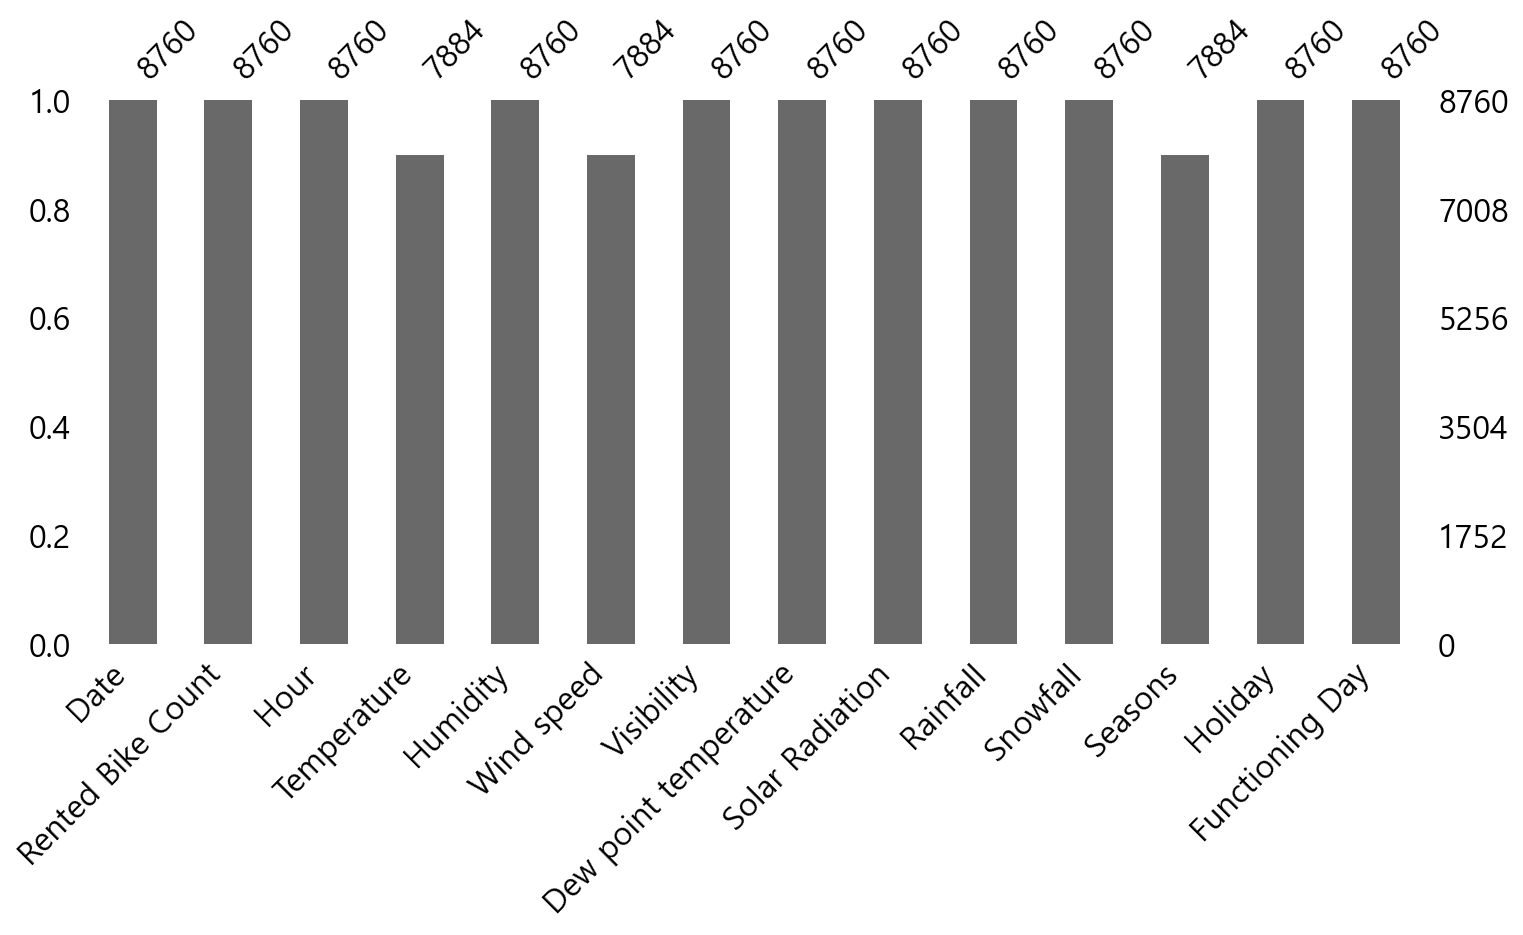

In [264]:
# 결측치 시각화
msno.bar(df, figsize=(12,5)) #msno.matrix() 에러 떠서 msno.bar()로 시각화(msno와 matplotlib 사이의 호환성 문제)

In [265]:
# 결측치 처리
df[['Temperature','Wind speed','Seasons']] #결측치가 특정 obs에만 있는 게 아니라, 랜덤으로 분포

,Temperature,Wind speed,Seasons
0,-5.2,2.2,NaN
1,-5.5,0.8,Winter
2,-6.0,1.0,Winter
3,-6.2,0.9,Winter
4,-6.0,NaN,Winter
...,...,...,...
8755,4.2,2.6,NaN
8756,3.4,2.3,Autumn
8757,2.6,0.3,Autumn
8758,2.1,1.0,Autumn


In [14]:
# 결측치 처리 : 제거
df.dropna(subset=['Temperature','Wind speed','Seasons'])
# 결측치가 하나라도 있는 행을 제거하니 총 행의 개수는 6367개로 전에 비해 많이 줄어들었음
# 제거하는 방법보다 대체하는 방법이 더 나아보임

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
# 결측치 처리 : 단일대체(평균, 중앙값, 최빈값)
df2=df.copy()

### 온도 결측치 처리하기

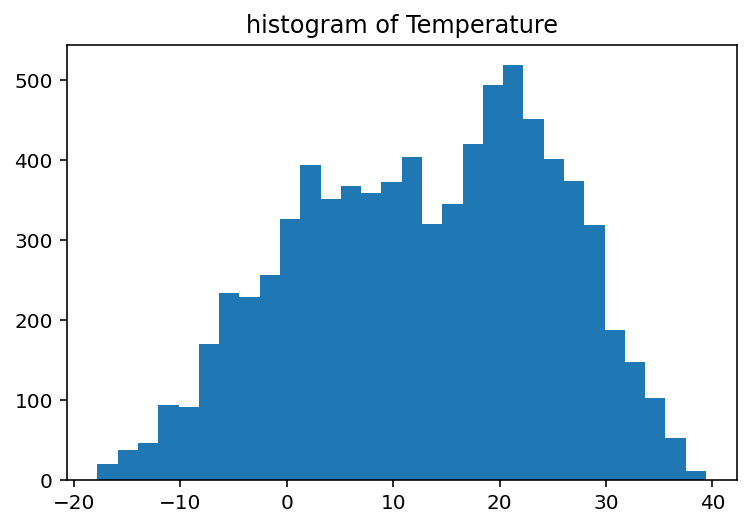

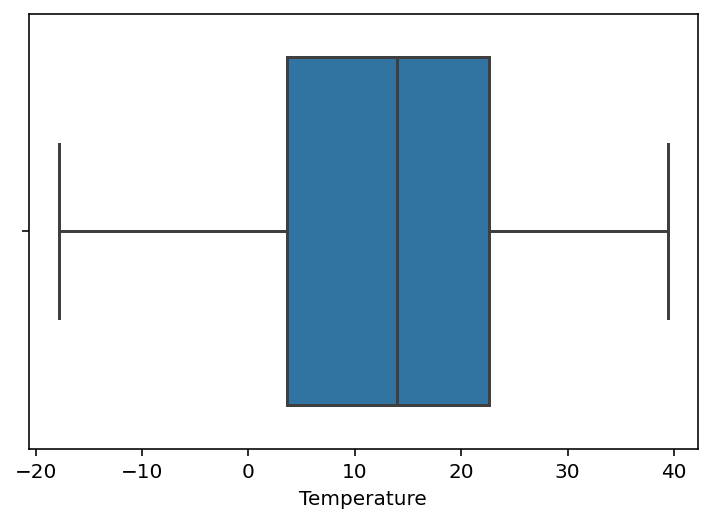

In [38]:
# 온도 분포 확인하기
# 히스토그램
df['Temperature']
plt.hist(df['Temperature'], bins=30)
plt.title('histogram of Temperature', fontsize=12)
plt.show()

# 박스플롯
sns.boxplot(df['Temperature'])
plt.show()

# IQR에 의해 온도 변수에는 이상치로 판단되는 데이터가 없음. 

### 방법 1 : 단일대체 

* 1-1. 평균값 대체

In [44]:
print(f'평균 : {round(df.Temperature.mean(),1)}') #온도는 소수점 한자리 수로 표기되어 있어 round() 사용
print(f'중앙값 : {round(df.Temperature.median(),1)}')
print(f'최빈값 : {df.Temperature.mode()[0]}')

평균 : 13.0
중앙값 : 13.9
최빈값 : 20.5


In [15]:
df2.Temperature = df.Temperature.fillna(round(df.Temperature.mean(),1))

In [17]:
print(f'대체 전 : {df.Temperature.isna().sum()}')
print(f'대체 후 : {df2.Temperature.isna().sum()}')

대체 전 : 876
대체 후 : 0


In [45]:
print(f'평균: {round(df2.Temperature.mean())}')
print(f'중앙값: {round(df2.Temperature.median(),1)}')
print(f'최빈값: {df2.Temperature.mode()[0]}') #모두 13으로 나오니까 좋은 대체 방법은 아님.

평균: 13
중앙값: 13.0
최빈값: 13.0


In [19]:
print(f'대체 전: {df.Temperature.std()}')
print(f'대체 후: {df2.Temperature.std()}') 

대체 전: 11.93601661646215
대체 후: 11.323430551458275


* 1-2. 중앙값 대체

In [46]:
df2.Temperature = df.Temperature.fillna(round(df.Temperature.median(),1))

In [47]:
print(f'대체 전 : {df.Temperature.isna().sum()}')
print(f'대체 후 : {df2.Temperature.isna().sum()}')

대체 전 : 876
대체 후 : 0


In [48]:
print(f'평균: {round(df2.Temperature.mean())}')
print(f'중앙값: {round(df2.Temperature.median(),1)}')
print(f'최빈값: {df2.Temperature.mode()[0]}') 

평균: 13
중앙값: 13.9
최빈값: 13.9


In [49]:
print(f'대체 전: {df.Temperature.std()}')
print(f'대체 후: {df2.Temperature.std()}') 

대체 전: 11.93601661646215
대체 후: 11.32646084931385


* 1-3. 최빈값 대체

In [52]:
df2.Temperature = df.Temperature.fillna(round(df.Temperature.mode()[0],1))

In [53]:
print(f'대체 전 : {df.Temperature.isna().sum()}')
print(f'대체 후 : {df2.Temperature.isna().sum()}')

대체 전 : 876
대체 후 : 0


In [54]:
print(f'평균: {round(df2.Temperature.mean())}')
print(f'중앙값: {round(df2.Temperature.median(),1)}')
print(f'최빈값: {df2.Temperature.mode()[0]}') 

평균: 14
중앙값: 16.4
최빈값: 20.5


In [55]:
print(f'대체 전: {df.Temperature.std()}')
print(f'대체 후: {df2.Temperature.std()}') #단일 대체 방법 중에는 최빈값 대체가 가장 좋음

대체 전: 11.93601661646215
대체 후: 11.543290434328108


### 방법2 : 다른 변수 활용

* 2-1. Date 변수로 그룹화한 뒤 온도의 평균으로 결측치 대체하기 `채택`

In [266]:
df3=df.copy()

In [267]:
df3.Temperature = df.groupby(['Date'])['Temperature'].transform(lambda x: x.fillna(x.mean()))

In [268]:
print(f"대체 전 : {df.Temperature.isna().sum()}")
print(f"대체 후 : {df3.Temperature.isna().sum()}")

대체 전 : 876
대체 후 : 0


In [269]:
print(f'평균: {round(df3.Temperature.mean())}')
print(f'중앙값: {round(df3.Temperature.median())}')
print(f'최빈값: {df3.Temperature.mode()[0]}')

평균: 13
중앙값: 14
최빈값: 20.5


In [270]:
print(f'대체 전: {df.Temperature.std()}')
print(f'대체 후: {df3.Temperature.std()}') #단일 대체 방법보다 표준편차가 크므로, 이 방법이 더 나은 것으로 판단

대체 전: 11.93601661646215
대체 후: 11.897456922530376


* 2-2. Date 변수 중 '월'과, Hour 변수를 활용해 온도의 결측치 대체하기

In [271]:
df4=df.copy()

In [272]:
# 'Date'와 'Hour' 열을 Datetime 형식으로 변환
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Hour'].astype(str) + ':00', format='%d/%m/%Y %H:%M')

# 'Datetime' 열에서 월과 시간대를 추출하여 새로운 열 추가
df['Month'] = df['Datetime'].dt.month
df['Hour'] = df['Datetime'].dt.hour

In [273]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Datetime,Month
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes,2017-12-01 00:00:00,12
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00,12
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00,12
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00,12
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00,12


In [274]:
df.groupby(['Month', 'Hour'])['Temperature'].mean().head(24)

Month  Hour
1      0      -4.778571
       1      -4.784615
       2      -4.318519
       3      -6.103704
       4      -5.757143
       5      -5.810714
       6      -6.160714
       7      -6.662963
       8      -6.780769
       9      -6.620690
       10     -4.971429
       11     -3.635714
       12     -1.925926
       13     -1.351852
       14     -0.453571
       15     -0.416000
       16     -0.300000
       17     -1.273077
       18     -2.660714
       19     -2.855172
       20     -3.425000
       21     -3.784000
       22     -4.175000
       23     -4.385185
Name: Temperature, dtype: float64

In [275]:
# 결측치를 월별 시간대의 평균값으로 대체
df4.Temperature = df['Temperature'].fillna(df.groupby(['Month', 'Hour'])['Temperature'].transform('mean'))

In [276]:
print(f'대체 전: {df.Temperature.isna().sum()}')
print(f'대체 후: {df4.Temperature.isna().sum()}')

대체 전: 876
대체 후: 0


In [277]:
print(f'평균: {round(df4.Temperature.mean())}')
print(f'중앙값: {df4.Temperature.median()}')
print(f'최빈값: {df4.Temperature.mode()[0]}')

평균: 13
중앙값: 13.7
최빈값: 20.5


In [278]:
print(f'대체 전: {df.Temperature.std()}')
print(f'대체 후: {df4.Temperature.std()}') 

#결측치 대체 전과 비교했을 때 2-1 방법의 표준편차가 가장 값이 크다.

대체 전: 11.93601661646215
대체 후: 11.871947564563364


### 방법 3 : 다중대체 

In [279]:
df5=df.copy()

In [280]:
# 새롭게 추가한 열은 더 이상 필요하지 않으니 삭제
df.drop(columns=['Datetime', 'Month'], inplace=True)

In [197]:
df._get_numeric_data().corr().Temperature.sort_values() #상관계수를 기준으로 위에서 높은 3개를 사용

Snowfall                -0.221321
Wind speed              -0.034464
Visibility               0.039581
Rainfall                 0.050215
Hour                     0.116151
Humidity                 0.156094
Solar Radiation          0.356539
Rented Bike Count        0.537229
Dew point temperature    0.912099
Temperature              1.000000
Name: Temperature, dtype: float64

In [59]:
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Snowfall', 'Wind speed', 'Visibility', 'Temperature']])
df5.Temperature=pd.DataFrame(imputed_arr, columns=['Snowfall', 'Wind speed', 'Visibility', 'Temperature']).Temperature.round()

In [61]:
print(f'대체 전: {df.Temperature.isna().sum()}')
print(f'대체 후: {df5.Temperature.isna().sum()}')

대체 전: 876
대체 후: 0


In [62]:
print(f'평균: {round(df5.Temperature.mean())}')
print(f'중앙값: {df5.Temperature.median()}')
print(f'최빈값: {df5.Temperature.mode()[0]}')

평균: 13
중앙값: 14.0
최빈값: 14.0


In [63]:
print(f'대체 전: {df.Temperature.std()}')
print(f'대체 후: {df5.Temperature.std()}') 

#결측치 대체 전과 비교했을 때 2-1 방법의 표준편차가 가장 값이 크므로, 2-1 채택

대체 전: 11.93601661646215
대체 후: 11.359234181518742


## 풍속 결측치 처리하기

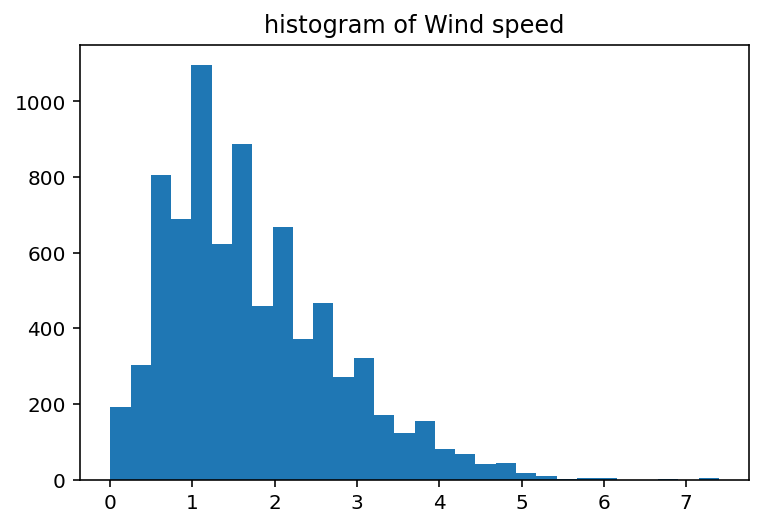

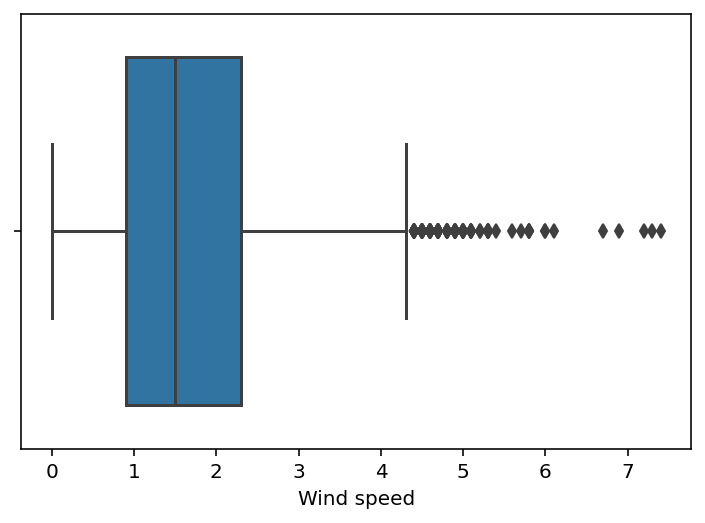

In [45]:
# 풍속 분포 확인하기
# 히스토그램
plt.hist(df['Wind speed'], bins=30)
plt.title('histogram of Wind speed', fontsize=12) #오른쪽으로 skew되어 있음 #중앙값으로 대체하는 것이 좋아보임
plt.show()

# 박스플롯
sns.boxplot(df['Wind speed'])
plt.show() 

# IQR에 의해 이상치가 존재하는 것을 확인할 수 있음

### 방법 1 : 단일대체

* 평균값 대체

In [43]:
# 풍속
print(f"평균 : {round(df['Wind speed'].mean(),1)}") #풍속은 소수점 한 자리로 표기되어 있어 round() 사용
print(f"중앙값 : {df['Wind speed'].median()}")
print(f"최빈값 : {df['Wind speed'].mode()[0]}")

평균 : 1.7
중앙값 : 1.5
최빈값 : 1.1


In [64]:
df3['Wind speed']=df['Wind speed'].fillna(df['Wind speed'].mean()) 

In [65]:
print(f"대체 전: {df['Wind speed'].isna().sum()}")
print(f"대체 후: {df3['Wind speed'].isna().sum()}")

대체 전: 876
대체 후: 0


In [67]:
print(f"평균 : {round(df3['Wind speed'].mean(),1)}") 
print(f"중앙값 : {df3['Wind speed'].median()}")
print(f"최빈값 : {round(df3['Wind speed'].mode()[0],1)}")

평균 : 1.7
중앙값 : 1.7
최빈값 : 1.7


In [68]:
print(f"대체 전: {df['Wind speed'].std()}")
print(f"대체 후: {df3['Wind speed'].std()}") 

대체 전: 1.0361375166363205
대체 후: 0.9829601218531897


* 중앙값 대체

In [69]:
df3['Wind speed']=df['Wind speed'].fillna(df['Wind speed'].median()) 

In [70]:
print(f"대체 전: {df['Wind speed'].isna().sum()}")
print(f"대체 후: {df3['Wind speed'].isna().sum()}")

대체 전: 876
대체 후: 0


In [71]:
print(f"평균 : {round(df3['Wind speed'].mean(),1)}") 
print(f"중앙값 : {df3['Wind speed'].median()}")
print(f"최빈값 : {round(df3['Wind speed'].mode()[0],1)}")

평균 : 1.7
중앙값 : 1.5
최빈값 : 1.5


In [72]:
print(f"대체 전: {df['Wind speed'].std()}")
print(f"대체 후: {df3['Wind speed'].std()}") 

대체 전: 1.0361375166363205
대체 후: 0.9853211265051932


* 최빈값 대체 `채택`

In [287]:
df3['Wind speed']=df['Wind speed'].fillna(df['Wind speed'].mode()[0]) 

In [288]:
print(f"대체 전: {df['Wind speed'].isna().sum()}")
print(f"대체 후: {df3['Wind speed'].isna().sum()}")

대체 전: 876
대체 후: 0


In [289]:
print(f"평균 : {round(df3['Wind speed'].mean(),1)}") 
print(f"중앙값 : {df3['Wind speed'].median()}")
print(f"최빈값 : {round(df3['Wind speed'].mode()[0],1)}")

평균 : 1.7
중앙값 : 1.4
최빈값 : 1.1


In [290]:
print(f"대체 전: {df['Wind speed'].std()}")
print(f"대체 후: {df3['Wind speed'].std()}") #단일 대체 방법 중에서는 최빈값 대체가 가장 좋음

대체 전: 1.0361375166363205
대체 후: 1.0008101975322996


### 방법 2 : 다중대체

In [281]:
df._get_numeric_data().corr()['Wind speed'].sort_values() #상관계수를 기준으로 위에서 높은 3개를 사용

Humidity                -0.336105
Dew point temperature   -0.178011
Temperature             -0.034464
Rainfall                -0.019080
Snowfall                -0.001319
Rented Bike Count        0.116558
Visibility               0.170671
Hour                     0.284573
Solar Radiation          0.331239
Wind speed               1.000000
Name: Wind speed, dtype: float64

In [282]:
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Humidity', 'Dew point temperature', 'Temperature', 'Wind speed']])
df3['Wind speed']=pd.DataFrame(imputed_arr, columns=['Humidity', 'Dew point temperature', 'Temperature', 'Wind speed'])['Wind speed'].round(1)

In [283]:
print(f"대체 전: {df['Wind speed'].isna().sum()}")
print(f"대체 후: {df3['Wind speed'].isna().sum()}")

대체 전: 876
대체 후: 0


In [285]:
print(f"평균: {round(df3['Wind speed'].mean(),1)}")
print(f"중앙값: {df3['Wind speed'].median()}")
print(f"최빈값: {df3['Wind speed'].mode()[0]}")

평균: 1.7
중앙값: 1.6
최빈값: 1.5


In [286]:
print(f"대체 전: {df['Wind speed'].std()}")
print(f"대체 후: {df3['Wind speed'].std()}") 

대체 전: 1.0361375166363205
대체 후: 0.9889273704939681


## 계절 결측치 처리하기

Spring    1990
Summer    1990
Autumn    1969
Winter    1935
Name: Seasons, dtype: int64


<Axes: xlabel='Seasons', ylabel='count'>

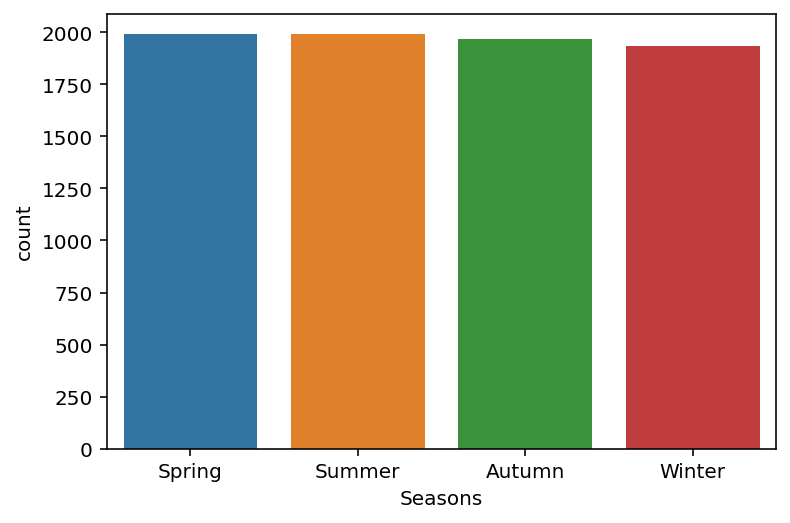

In [140]:
# 계절 분포 확인하기
print(df.Seasons.value_counts())

# 막대그래프
sns.countplot(x='Seasons', data=df, order=['Spring','Summer','Autumn','Winter'])

In [291]:
# 다시 앞에서 했던 Month 변수를 살려서 월에 따른 계절의 최빈값으로 Seasons의 결측치를 대체
# 'Date'와 'Hour' 열을 Datetime 형식으로 변환
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Hour'].astype(str) + ':00', format='%d/%m/%Y %H:%M')

# 'Datetime' 열에서 월과 시간대를 추출하여 새로운 열 추가
df['Month'] = df['Datetime'].dt.month
df['Hour'] = df['Datetime'].dt.hour

In [292]:
# 계절의 결측치를 각각의 Month 그룹에서 최빈값으로 대체
df3['Seasons'] = df['Seasons'].fillna(df.groupby(['Month'])['Seasons'].transform(lambda x: x.mode().iloc[0]))

In [293]:
df3.Seasons.isna().sum()

0

In [294]:
df3.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [295]:
# 결측치를 모두 대체한 데이터셋 생성
df3.isna().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

## 이상치 및 파생변수

In [296]:
df3.describe()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.906192,58.226256,1.664498,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.897457,20.362413,1.000810,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,1.000000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.762154,57.000000,1.400000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.200000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [297]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [298]:
# 연속형 변수에 대해 히스토그램 및 박스플롯 그리기
df4 = df3[['Rented Bike Count','Temperature','Humidity','Wind speed','Visibility','Dew point temperature','Solar Radiation','Rainfall','Snowfall']]
df4

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,1.1,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


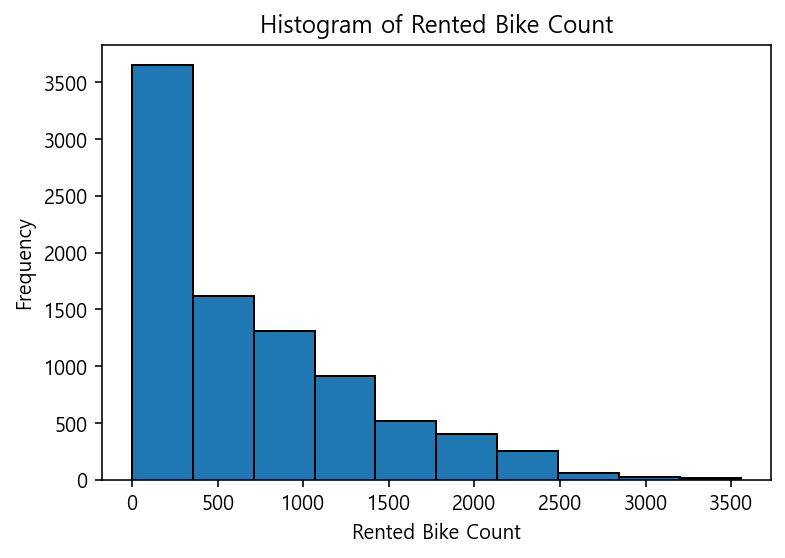

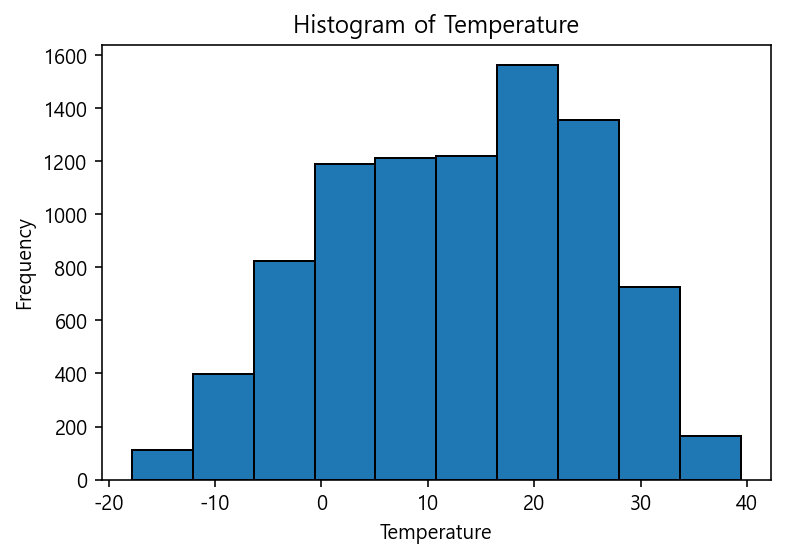

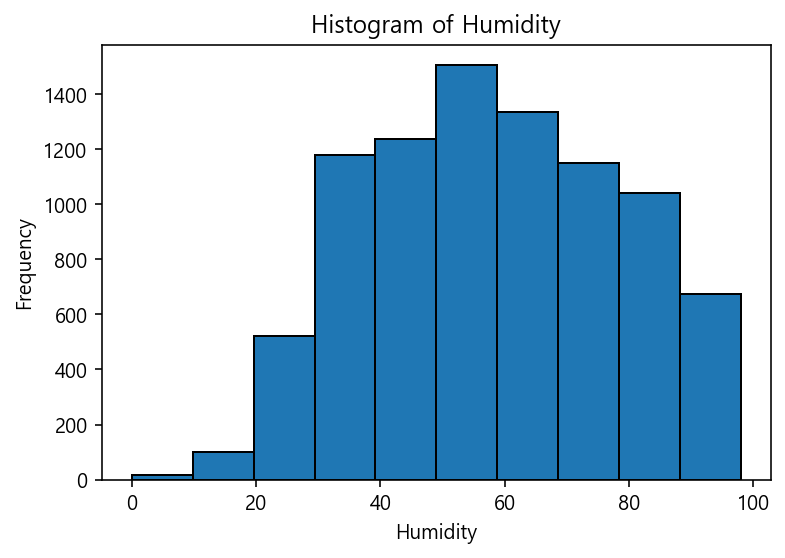

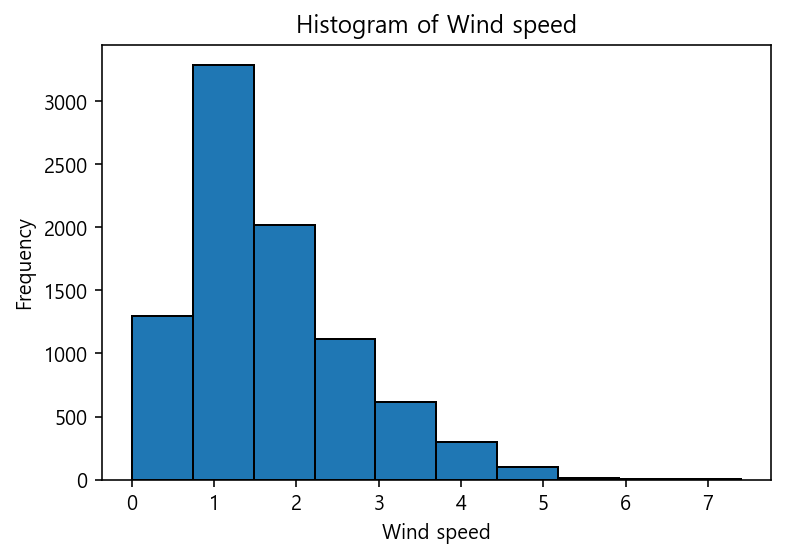

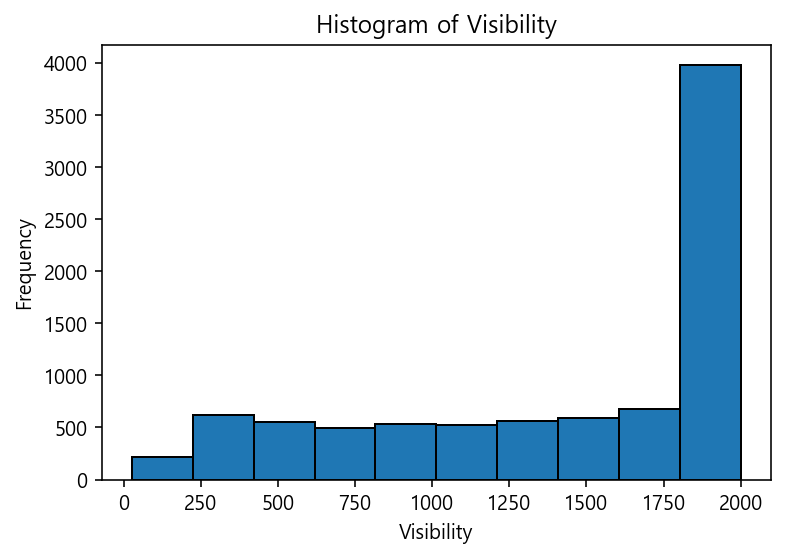

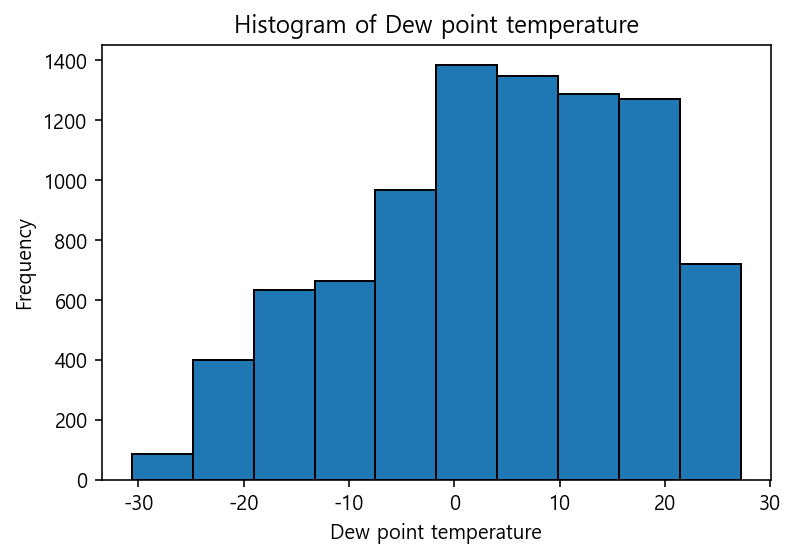

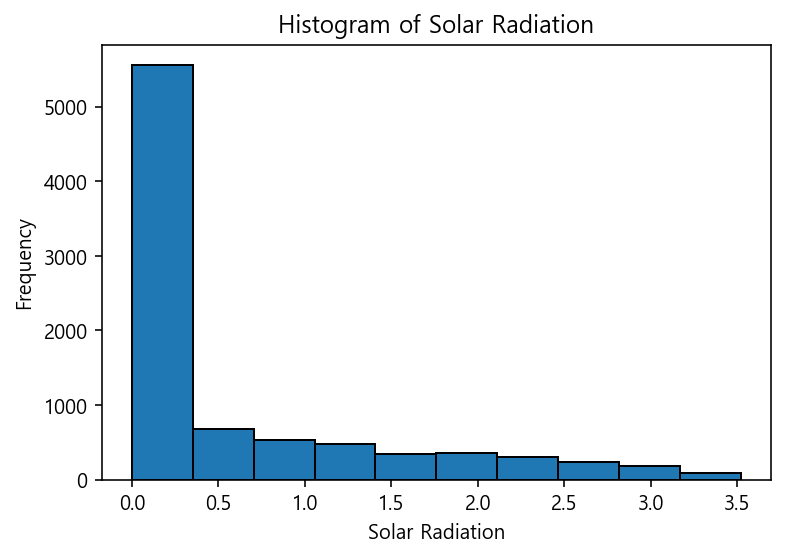

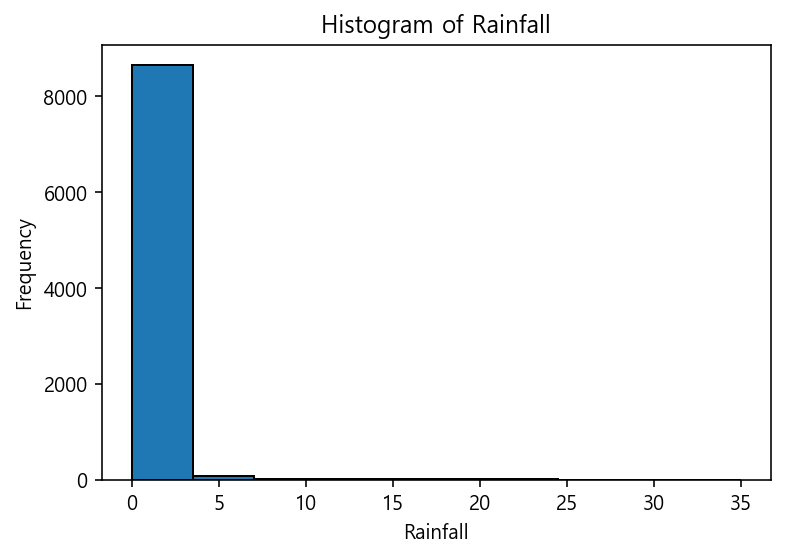

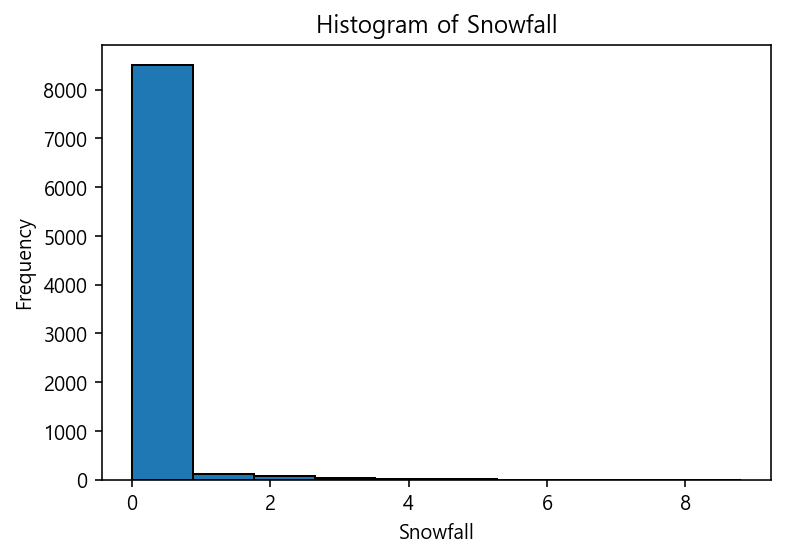

In [299]:
for column in df4.columns:
    plt.hist(df4[column], bins=10, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

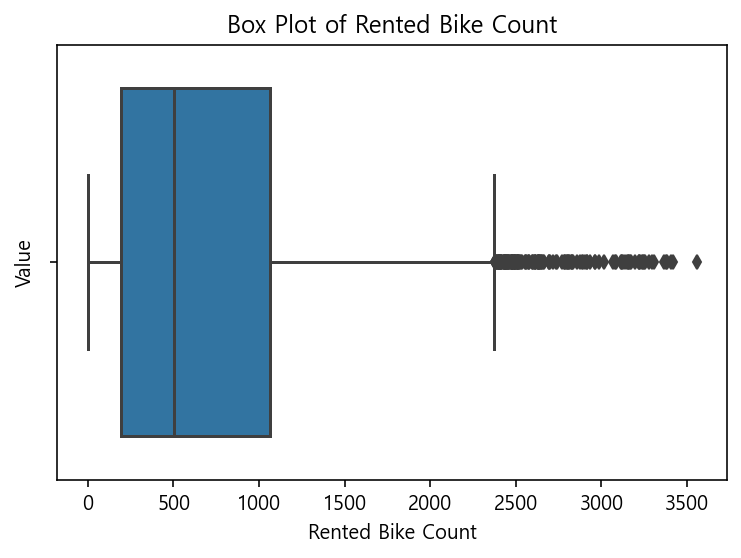

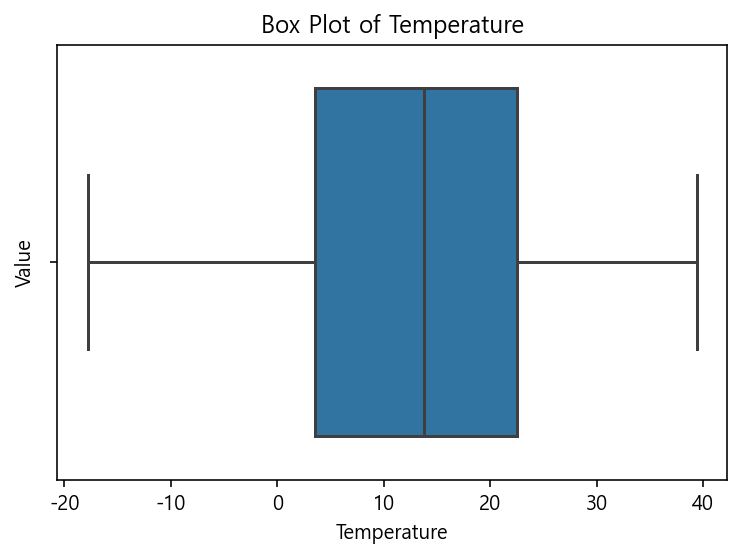

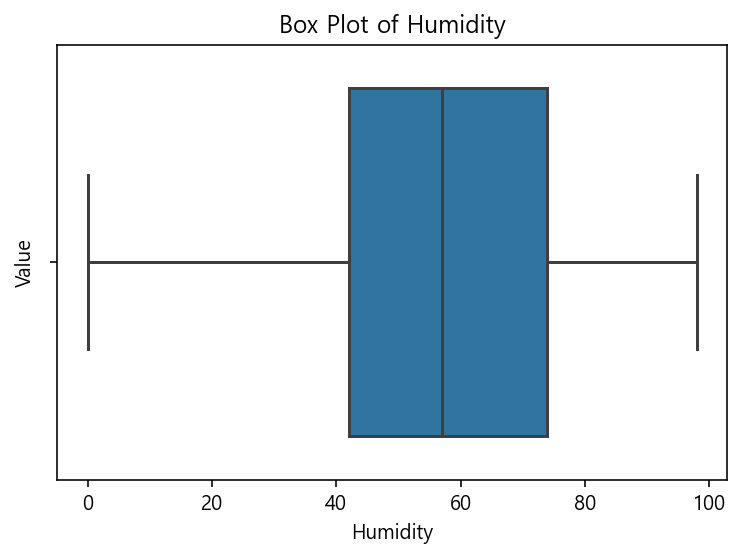

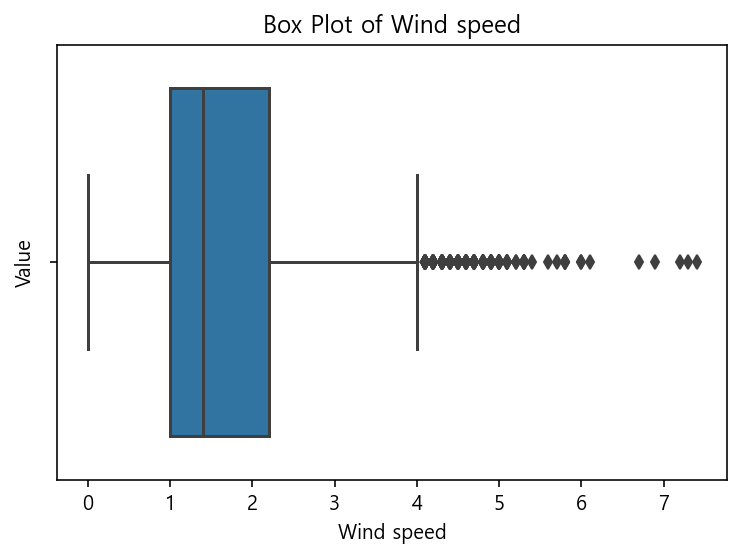

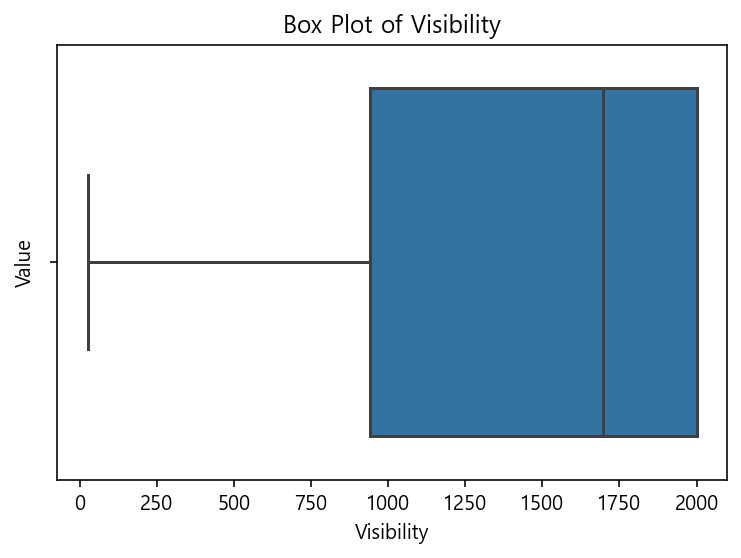

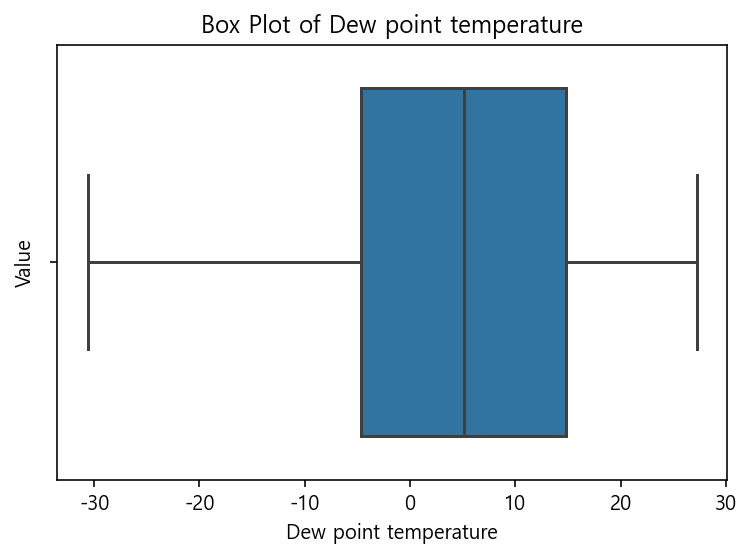

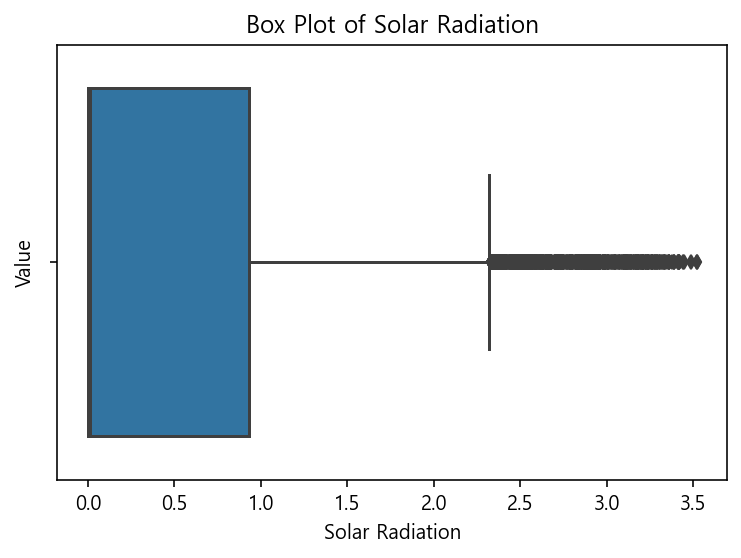

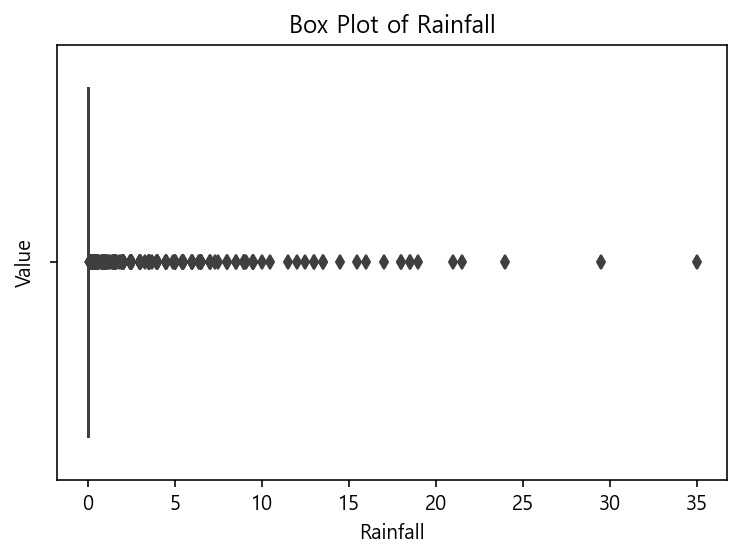

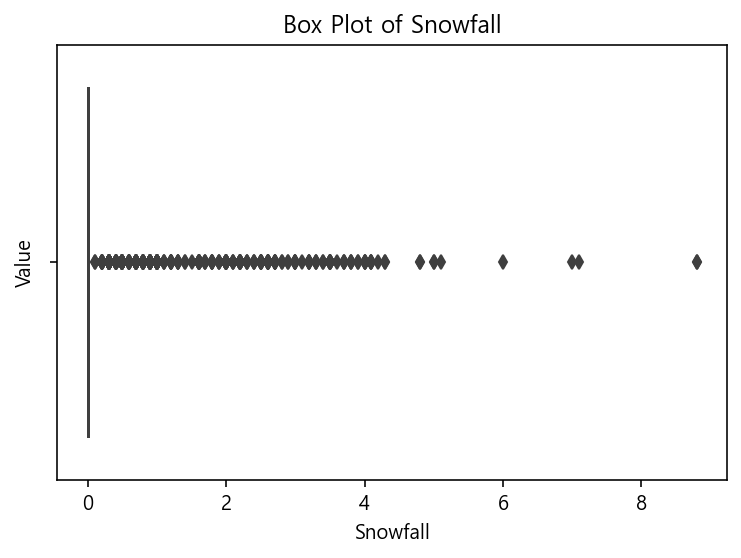

In [300]:
for column in df4.columns:
    sns.boxplot(x=df4[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

### 히스토그램 및 박스플롯 분석 결과
- `자전거 대여량` : 오른쪽으로 skew 되어 있다. 어느 날의 특정 시간대 대여량이 2500 이상인 경우는 드물다고 판단하여 따로 분리해서 확인해야 할 것 같다.
- `온도` : -20도 이하 값을 가지는 데이터는 없다.(찾아보니 서울 날씨가 영하 20도보다 더 하락하는 경우는 거의 없었다.)
- `습도` : 20% 이하의 값을 가지는 데이터는 드물게 나타난다. 겨울이면 습도가 낮아질 거라고 예상해서 정규분포 모양을 예상했는데, 찾아보니 일반적으로 여름의 경우 평균 습도값은 약 70%, 봄,가을,겨울의 경우 40~50%라고 한다. 습도는 계절별로 차이가 나기도 하지만, 하루 중에도 시간에 따라 달라지는 것을 생각해야 한다.
- `풍속` : 대부분의 데이터가 1~2m/s정도의 값을 가지며, 3m/s 이상의 값을 가지는 경우도 종종 나타난다. 6m/s, 7m/s의 값도 충분히 있을 수 있는 값이므로 이상치라고 판단하기는 어렵다.  
- `가시거리` : 왼쪽으로 skew 되어 있다. 안개 등으로 인해 공기의 질이 좋지 않은 경우 가시거리가 짧다고 한다. 가시거리가 대부분 18km~20km이므로 맑은 날이 많은 것을 확인할 수 있다. 맑은 날과 그렇지 않은 경우를 분리해서 분석하는 것도 또 다른 방법이라고 생각한다. 강수량과 함께 분석하여 강수량이 많은 경우 안개가 있는 날이라고 보고 가시거리가 짧은지 확인해야 할 것 같다.
- `이슬점` : 이슬점은 공기 중에 수증기가 가득 차서(포화 수증기 상태) 이슬이 생기기 시작하는 온도이다. 공기 중에 수증기가 많아서 습도가 높으면 이슬점이 높게 나타난다. => 이슬점이 높을수록 습도가 높다. / 공기 중에 물기가 많으면 온도가 높더라도 이슬이 맺힌다. / 습도(상대습도)가 100%가 되면 이슬점 = 현재 기온이 된다. / 이슬점이 높다 = 습도가 높다 = 불쾌하다 => 따라서 이슬점은 습도와 관련이 있으며, 온도와는 직접적인 관련이 없다고 볼 수 있다. / 이슬점 히스토그램에서는 이상치라고 판단할 만한 값이 없다고 생각된다.
- `일사량(MJ/m2)` : MJ/m2는 1m^2의 면적에서 얻을 수 있는 에너지량을 의미한다. 1MJ = 약 277.8Wh이다. (1Wh = 3600J) / 기상청의 종관기상관측자료에 따르면 2017년 12월 1일부터 2018년 11월 30일까지의 서울 지역의 평균 일사량은 1.043235MJ 정도였다.따라서 히스토그램처럼 1 이하의 값을 가지는 경우가 대부분인 것을 알 수 있으며, 기상청 데이터를 통해 3 이상의 값을 가지는 경우도 논리적으로 가능하다. 밤, 새벽 시간대에 일사량이 0을 가지는 지 확인해야 할 것 같다. 
- `강수량` : 강수량은 대부분이 5mm 미만의 값을 가진다. 비가 오지 않는 날이 많다고 해도 전체 데이터의 대부분을 차지한다는 건 이상하게 느껴진다. 확인해야 할 것 같다.
- `적설량` : 적설량은 대부분이 1cm 미만의 값을 가진다. 눈이 많이 오는 날은 10cm가 넘어가는 날도 있는데 그런 값들이 표시되지 않은 게 이상하게 느껴진다. 확인해야 할 것 같다.

## Rented Bike Count(자전거 대여량)

In [37]:
df3['Rented Bike Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [301]:
# 요일이라는 파생 변수 생성하기
df3['Date'] = pd.to_datetime(df3['Date'], format='%d/%m/%Y')
df3['Day_of_Week'] = df3['Date'].dt.day_name()

In [302]:
display(df3.head())
display(df3.tail())

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.0,36,1.1,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


In [95]:
# 2500 이상의 값을 가지는 경우만 추출
df_bike = df3[df3['Rented Bike Count'] >= 2500]
df_bike = df_bike.sort_values(by='Rented Bike Count', ascending=False)
df_bike

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week
4818,2018-06-19,3556,18,24.100000,57,3.0,1301,15.0,0.56,0.0,0.0,Summer,No Holiday,Yes,Tuesday
4866,2018-06-21,3418,18,27.800000,43,3.0,1933,14.0,1.35,0.0,0.0,Summer,No Holiday,Yes,Thursday
4650,2018-06-12,3404,18,24.900000,53,2.0,2000,14.6,1.28,0.0,0.0,Summer,No Holiday,Yes,Tuesday
4842,2018-06-20,3384,18,27.000000,55,3.0,1246,17.1,1.26,0.0,0.0,Summer,No Holiday,Yes,Wednesday
4458,2018-06-04,3380,18,22.695455,48,2.0,1998,12.6,0.56,0.0,0.0,Summer,No Holiday,Yes,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7530,2018-10-10,2514,18,12.200000,45,3.0,2000,0.5,0.16,0.0,0.0,Autumn,No Holiday,Yes,Wednesday
4435,2018-06-03,2514,19,27.400000,29,2.0,2000,7.7,0.50,0.0,0.0,Summer,No Holiday,Yes,Sunday
4460,2018-06-04,2508,20,23.400000,43,1.0,2000,10.0,0.01,0.0,0.0,Summer,No Holiday,Yes,Monday
4653,2018-06-12,2505,21,20.600000,70,2.0,1986,14.9,0.00,0.0,0.0,Summer,No Holiday,Yes,Tuesday


In [48]:
df_bike.shape # 전체 데이터 중 약 1% 정도로 대여량이 2500 이상인 경우는 극히 드물다고 볼 수 있다.

(97, 15)

In [49]:
df_bike.Hour.value_counts() # 17~21시에 대여한 것을 알 수 있음. => 퇴근 시간대에 자전거를 이용한 것으로 보임.

18    68
19    21
20     6
21     1
17     1
Name: Hour, dtype: int64

In [42]:
df_bike.Seasons.value_counts() # 대여량이 많은 날의 계절은 여름 > 가을 > 봄 순 # 겨울은 포함되지 않은 것을 확인할 수 있다.

Summer    56
Autumn    21
Spring    20
Name: Seasons, dtype: int64

In [58]:
df_bike['Day_of_Week'].value_counts() # 특정 요일이 뚜렷하게 많이 나타난 것은 아니지만, 예상 외로 주말이 거의 없다.

Friday       23
Monday       21
Wednesday    19
Tuesday      17
Thursday     16
Sunday        1
Name: Day_of_Week, dtype: int64

In [56]:
df_bike.Holiday.value_counts() #대여량이 많은 경우, 아마도 휴일일 가능성이 높다고 생각했는데, 예상 외로 휴일인 경우는 없었다.

No Holiday    97
Holiday        0
Name: Holiday, dtype: int64

- 어느 날 특정 시간대의 대여량이 2500 이상인 것은 드물다고 판단했고, 데이터의 개수 역시 전체 데이터의 1% 정도만을 차지한 것을 확인하였다.
- 따라서 해당 데이터를 이상치라고 파악해 제거할 필요는 없다고 생각한다.
- 약 100개 정도의 데이터가 대여량이 2500 이상으로 많은 이유에 대해서는 뚜렷하게 알 수 없지만, 퇴근시간대와 여름, 평일에 대여량이 많은 것 알 수 있었다.

## Visibility(가시거리)
- Rainfall(강수량)과 함께 분석

In [57]:
df3.Visibility

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
8755    1894
8756    2000
8757    1968
8758    1859
8759    1909
Name: Visibility, Length: 8760, dtype: int64

In [59]:
# 강수량이 0 초과인 경우만 추출하기
df_rain = df3[df3['Rainfall'] > 0]
df_rain

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week
51,2017-12-03,117,3,3.4,71,2.0,1011,-1.3,0.00,0.5,0.0,Winter,No Holiday,Yes,Sunday
54,2017-12-03,13,6,3.4,86,2.0,278,1.2,0.00,1.0,0.0,Winter,No Holiday,Yes,Sunday
57,2017-12-03,152,9,3.5,91,2.0,231,2.1,0.02,2.5,0.0,Winter,No Holiday,Yes,Sunday
78,2017-12-04,200,6,1.2,76,4.0,371,-2.5,0.00,0.1,0.0,Winter,No Holiday,Yes,Monday
120,2017-12-06,145,0,-2.8,77,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,2018-11-09,0,9,10.8,78,3.0,1985,7.1,0.13,0.5,0.0,Autumn,No Holiday,No,Friday
8520,2018-11-21,119,0,7.2,74,1.0,772,2.8,0.00,0.2,0.0,Autumn,No Holiday,Yes,Wednesday
8523,2018-11-21,112,3,6.5,87,1.0,710,4.4,0.00,1.0,0.0,Autumn,No Holiday,Yes,Wednesday
8601,2018-11-24,24,9,0.3,97,3.0,34,-0.1,0.00,9.1,7.1,Autumn,No Holiday,Yes,Saturday


In [61]:
print(min(df_rain.Visibility))
print(max(df_rain.Visibility))

34
2000


In [64]:
min(df3.Visibility)

27

In [63]:
df3[df3['Visibility']==27]

# 가시거리의 최솟값은 강수량이 0 초과일 때 나타날 거라고 예상했으나
# 예상과 달리 강수량이 0일 때 가시거리의 최솟값이 있는 것으로 확인되었다.
# 이 경우 계절이 봄이고, 시간대가 새벽 4시, 습도가 98%인 것을 통해 비로 인한 안개가 아니라, 미세먼지 혹은 새벽의 안개라고 판단할 수 있다.

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week
3916,2018-05-13,83,4,13.8,98,3.0,27,13.4,0.0,0.0,0.0,Spring,No Holiday,Yes,Sunday


In [69]:
# 가시거리가 18km 이상인 경우만 추출하기
df_vis = df3[df3['Visibility'] >= 1800]
df_vis

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week
0,2017-12-01,254,0,-5.2,37,2.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.2,40,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.0,36,2.0,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,3.0,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8756,2018-11-30,764,20,3.4,37,2.0,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8757,2018-11-30,694,21,2.6,39,0.0,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


In [70]:
df_vis.Seasons.value_counts()

Autumn    1212
Winter    1046
Summer    1035
Spring     690
Name: Seasons, dtype: int64

- 가시거리는 강수량 뿐만 아니라, 시간대, 습도, 계절 등의 영향을 받는다.
- 따릉이 데이터의 경우 전체 데이터의 약 45%가 가시거리가 18km 이상이었다.
- 이 경우 계절의 빈도분석 결과, 가을과 겨울이 약 55%을 차지하며, 봄은 가장 적은 것으로 나타났다. -> 가시거리는 가을과 겨울에 긴 것으로 알 수 있으며, 봄에는 가시거리가 짧은 것을 알 수 있다.
- 따라서 봄을 제외한 나머지 계절의 경우 가시거리가 대부분 길기 때문에 가시거리가 18km 이상인 경우를 이상치라고 판단할 필요는 없다고 생각한다.

## Solar Radiation(일사량)
- Hour(시간대)와 함께 분석

In [71]:
df3['Solar Radiation']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Solar Radiation, Length: 8760, dtype: float64

In [73]:
df_hour = df3[df3.Hour >= 21]
df_hour

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week
21,2017-12-01,405,21,-2.194737,81,1.0,1687,-3.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
22,2017-12-01,398,22,-2.194737,83,2.0,1380,-3.4,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
23,2017-12-01,323,23,-2.194737,84,1.0,1265,-3.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
45,2017-12-02,377,21,4.100000,55,1.0,1448,-4.1,0.0,0.0,0.0,Winter,No Holiday,Yes,Saturday
46,2017-12-02,354,22,3.500000,54,2.0,1446,-4.9,0.0,0.0,0.0,Winter,No Holiday,Yes,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,2018-11-29,726,22,3.000000,59,1.0,1218,-4.2,0.0,0.0,0.0,Autumn,No Holiday,Yes,Thursday
8735,2018-11-29,559,23,3.268421,56,2.0,1394,-5.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Thursday
8757,2018-11-30,694,21,2.600000,39,0.0,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8758,2018-11-30,712,22,2.100000,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


In [74]:
df_hour['Solar Radiation'].value_counts()

0.0    1095
Name: Solar Radiation, dtype: int64

In [79]:
df_hour2 = df3[(df3.Hour >= 0) & (df3.Hour <= 5)]
df_hour2

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week
0,2017-12-01,254,0,-5.200000,37,2.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.500000,38,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.200000,40,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.000000,36,2.0,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8737,2018-11-30,456,1,1.300000,63,2.0,1379,-4.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8738,2018-11-30,300,2,0.600000,66,0.0,1368,-5.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8739,2018-11-30,213,3,-0.100000,69,1.0,1338,-5.1,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8740,2018-11-30,116,4,2.904348,71,0.0,1345,-5.1,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


In [80]:
df_hour2['Solar Radiation'].value_counts()

0.0    2190
Name: Solar Radiation, dtype: int64

- 밤과 새벽 시간대 모두 일사량은 0의 값을 가지는 것을 확인할 수 있었다.

## Rainfall(강수량)
- 월별 강수일수를 구한 뒤 총 강수일수를 구한다. 이후 실제 기상청 자료와 비교한다.

In [81]:
df3.Rainfall

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Rainfall, Length: 8760, dtype: float64

In [96]:
df_rain0 = df3[df3['Rainfall'] == 0]
df_rain0 #전체 데이터의 95% 차지

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week
0,2017-12-01,254,0,-5.2,37,2.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.2,40,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.0,36,2.0,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,3.0,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8756,2018-11-30,764,20,3.4,37,2.0,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8757,2018-11-30,694,21,2.6,39,0.0,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


In [97]:
df3

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week
0,2017-12-01,254,0,-5.2,37,2.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.2,40,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.0,36,2.0,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,3.0,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8756,2018-11-30,764,20,3.4,37,2.0,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8757,2018-11-30,694,21,2.6,39,0.0,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


In [106]:
df3['Date'] = pd.to_datetime(df3['Date'], format='%d/%m/%Y')

In [107]:
df3

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week
0,2017-12-01,254,0,-5.2,37,2.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.2,40,1.0,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.0,36,2.0,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,3.0,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8756,2018-11-30,764,20,3.4,37,2.0,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8757,2018-11-30,694,21,2.6,39,0.0,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


In [210]:
df.Month

0       12
1       12
2       12
3       12
4       12
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: Month, Length: 8760, dtype: int64

In [303]:
df3['Datetime'] = df['Datetime']
df3['Month'] = df['Month']

In [304]:
# 월별 강수일수 구해보기
df3['Date'] = df3['Datetime'].dt.date
rainy_days = df3[df3['Rainfall'] > 0].drop_duplicates(subset='Date')['Date']
rainy_days = pd.to_datetime(rainy_days)
monthly_rainy_days = rainy_days.groupby(rainy_days.dt.to_period("M")).size()
monthly_rainy_days

Date
2017-12     9
2018-01     6
2018-02     3
2018-03     7
2018-04    10
2018-05    11
2018-06    11
2018-07     9
2018-08    15
2018-09    10
2018-10     6
2018-11     5
Freq: M, Name: Date, dtype: int64

In [34]:
monthly_rainy_days.sum() #102일 

102

- 강수량이 0인 집단은 전체 데이터의 약 95%을 차지한다.
- 월별 강수일수를 더해보니 총 102일이 나온 것을 확인할 수 있다.
- [기상청 강수일수 자료]('https://data.kma.go.kr/stcs/grnd/grndRnDay.do?pgmNo=156')를 통해 2018년 서울 강수일수 분석 결과 약 100일 정도 비가 온 것을 확인할 수 있다.
- 따라서 강수량이 0인 경우가 너무 많아서 0 중에서 일부는 오히려 결측치라고 예상했던 것과 달리 실제 강수량과 비슷한 것으로 나타났다.

## Snowfall(적설량)
- 월별 적설일수를 구한 뒤 총 적설일수를 구한다. 이후 실제 기상청 자료와 비교한다.

In [35]:
df3.Snowfall

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Snowfall, Length: 8760, dtype: float64

In [36]:
# 월별 적설일수 구해보기
df3['Date'] = df3['Datetime'].dt.date
snowy_days = df3[df3['Snowfall'] > 0].drop_duplicates(subset='Date')['Date']
snowy_days = pd.to_datetime(snowy_days)
monthly_snowy_days = snowy_days.groupby(snowy_days.dt.to_period("M")).size()
monthly_snowy_days

Date
2017-12     9
2018-01    12
2018-02     3
2018-11     3
Freq: M, Name: Date, dtype: int64

In [37]:
monthly_snowy_days.sum() #27일

27

- 월별 적설일수를 더해보니 총 27일이 나온 것을 확인할 수 있다.
- [기상청 눈일수 자료]('https://data.kma.go.kr/climate/snw/selectSnwChart.do?pgmNo=697')를 통해 2018년 서울 눈일수 분석 결과 약 24일 정도 눈이 온 것을 확인할 수 있다.
- 따라서 적설량이 0인 경우가 너무 많아서 0 중에서 일부는 오히려 결측치라고 예상했던 것과 달리 실제 적설량과 비슷한 것으로 나타났다.

## 변수변환
- int : 정수형
- float : 실수형
- object : 문자형
- category : 범주형
- datetime : 날짜형

In [305]:
df3.info()
# Seasons, Holiday, Functioning Day, Day_of_Week, Month : category형으로 변환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   object        
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [306]:
df3.Seasons = df3.Seasons.astype('category')
print(df3.Seasons)

df3.Holiday = df3.Holiday.astype('category')
print(df3.Holiday)

df3['Functioning Day'] = df3['Functioning Day'].astype('category')
print(df3['Functioning Day'])

df3['Day_of_Week'] = df3['Day_of_Week'].astype('category')
print(df3['Day_of_Week'])

df3.Month = df3.Month.astype('category')
print(df3.Month)

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8760, dtype: category
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']
0       No Holiday
1       No Holiday
2       No Holiday
3       No Holiday
4       No Holiday
           ...    
8755    No Holiday
8756    No Holiday
8757    No Holiday
8758    No Holiday
8759    No Holiday
Name: Holiday, Length: 8760, dtype: category
Categories (2, object): ['Holiday', 'No Holiday']
0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
8755    Yes
8756    Yes
8757    Yes
8758    Yes
8759    Yes
Name: Functioning Day, Length: 8760, dtype: category
Categories (2, object): ['No', 'Yes']
0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
         ...  
8755    Friday
8756    Friday
8757    Friday
8758    Friday
8759    Friday
Name: Day_of_Week, Length: 8760, 

## Functioning Day(운영일)
- Yes인 경우와 No인 경우를 나눠서 분석하기

In [307]:
df_yes = df3[df3['Functioning Day']=='Yes'] #전체 데이터의 약 95%을 차지
df_yes

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week,Datetime,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 00:00:00,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 01:00:00,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 02:00:00,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 03:00:00,12
4,2017-12-01,78,4,-6.0,36,1.1,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 04:00:00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,2018-11-30 19:00:00,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,2018-11-30 20:00:00,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,2018-11-30 21:00:00,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,2018-11-30 22:00:00,11


In [308]:
df_no = df3[df3['Functioning Day']=='No']
df_no # 전체 데이터의 약 5%을 차지

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week,Datetime,Month
3144,2018-04-11,0,0,12.8,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,Wednesday,2018-04-11 00:00:00,4
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,Wednesday,2018-04-11 01:00:00,4
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,Wednesday,2018-04-11 02:00:00,4
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,Wednesday,2018-04-11 03:00:00,4
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,Wednesday,2018-04-11 04:00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,Friday,2018-11-09 19:00:00,11
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,Friday,2018-11-09 20:00:00,11
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,Friday,2018-11-09 21:00:00,11
8254,2018-11-09,0,22,11.2,75,1.1,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,Friday,2018-11-09 22:00:00,11


In [167]:
print(df_yes.Holiday.value_counts()) #휴일이 아닌 경우 : 약 95%, 휴일인 경우 : 약 5%
print(df_no.Holiday.value_counts())  #휴일이 아닌 경우 : 약 92%, 휴일인 경우 : 약 8%
# 따릉이 대여 서비스를 운영하지 않는 날은 휴일일 가능성이 있다고 생각했다. 
# 서비스 운영 여부는 휴일 여부와 상관이 없다고 볼 수 있다.

No Holiday    8057
Holiday        408
Name: Holiday, dtype: int64
No Holiday    271
Holiday        24
Name: Holiday, dtype: int64


In [168]:
print(df_yes.Seasons.value_counts())
print(df_no.Seasons.value_counts())
# 따릉이 대여 서비스를 운영하지 않는 날은 봄이나 가을일 가능성이 높다. 

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64
Autumn    247
Spring     48
Winter      0
Summer      0
Name: Seasons, dtype: int64


In [169]:
print(df_yes['Day_of_Week'].value_counts())
print(df_no['Day_of_Week'].value_counts())
# 따릉이 대여 서비스를 운영하지 않는 날은 주로 화,수,목,금요일이다.

Monday       1248
Sunday       1224
Friday       1224
Saturday     1217
Wednesday    1200
Thursday     1200
Tuesday      1152
Name: Day_of_Week, dtype: int64
Tuesday      96
Wednesday    48
Thursday     48
Friday       48
Saturday     31
Sunday       24
Monday        0
Name: Day_of_Week, dtype: int64


In [309]:
# 날짜 변수 중 '일'만 따로 뗴어 추출한 뒤 주로 몇 일에 운영을 하지 않는지 알아보기
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Day'] = df3['Date'].dt.day
df3.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week,Datetime,Month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 00:00:00,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 01:00:00,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 02:00:00,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 03:00:00,12,1
4,2017-12-01,78,4,-6.0,36,1.1,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 04:00:00,12,1


In [310]:
df3.Day.dtype

dtype('int64')

In [311]:
df3.Day = df3.Day.astype('category')
df3.Day.dtype

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31],
                 ordered=False)

In [312]:
df_yes = df3[df3['Functioning Day']=='Yes'] #전체 데이터의 약 95%을 차지
display(df_yes.head())

df_no = df3[df3['Functioning Day']=='No']
display(df_no.head())

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week,Datetime,Month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 00:00:00,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 01:00:00,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 02:00:00,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 03:00:00,12,1
4,2017-12-01,78,4,-6.0,36,1.1,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 04:00:00,12,1


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week,Datetime,Month,Day
3144,2018-04-11,0,0,12.8,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,Wednesday,2018-04-11 00:00:00,4,11
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,Wednesday,2018-04-11 01:00:00,4,11
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,Wednesday,2018-04-11 02:00:00,4,11
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,Wednesday,2018-04-11 03:00:00,4,11
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,Wednesday,2018-04-11 04:00:00,4,11


In [313]:
print(df_yes['Day'].value_counts())
print(df_no['Day'].value_counts())

# 특정 날짜에 운영을 하지 않는다고 생각했는데, 특정 날짜와 상관없이 운영을 하지 않는 것으로 보인다.

16    288
20    288
5     288
7     288
8     288
12    288
13    288
14    288
15    288
17    288
1     288
21    288
27    288
22    288
23    288
24    288
25    288
26    288
2     264
3     264
4     264
29    264
28    264
10    264
19    264
11    264
18    264
6     257
9     240
30    240
31    168
Name: Day, dtype: int64
9     48
6     31
19    24
2     24
28    24
3     24
4     24
30    24
11    24
18    24
10    24
31     0
7      0
8      0
13     0
5      0
12     0
16     0
14     0
15     0
17     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
29     0
1      0
Name: Day, dtype: int64


- Funtioning Day == 'No'인 경우, 가을이거나 봄일 가능성이 높다.
- 운영하지 않는 요일은 주로 화/수/목/금으로 평일이다. 월요일은 항상 운영을 했다.
- 운영 여부는 특정 날짜와는 상관이 없는 것으로 나타났다.

## Functioning Day == 'No' 인 경우를 제외하고 전처리 진행

In [314]:
data = df3[df3['Functioning Day'] == 'Yes']
data2 = data.reset_index(drop=True)
data2.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week,Datetime,Month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 00:00:00,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 01:00:00,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 02:00:00,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 03:00:00,12,1
4,2017-12-01,78,4,-6.0,36,1.1,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 04:00:00,12,1


In [315]:
# 다시 기초통계분석하기
print(data2.shape)

display(data2.head())
display(data2.tail())

print(data2.info())
display(data2.describe())

display(data2.corr())

(8465, 18)


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week,Datetime,Month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 00:00:00,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 01:00:00,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 02:00:00,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 03:00:00,12,1
4,2017-12-01,78,4,-6.0,36,1.1,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,2017-12-01 04:00:00,12,1


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day_of_Week,Datetime,Month,Day
8460,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,2018-11-30 19:00:00,11,30
8461,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,2018-11-30 20:00:00,11,30
8462,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,2018-11-30 21:00:00,11,30
8463,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,2018-11-30 22:00:00,11,30
8464,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,2018-11-30 23:00:00,11,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8465 non-null   datetime64[ns]
 1   Rented Bike Count      8465 non-null   int64         
 2   Hour                   8465 non-null   int64         
 3   Temperature            8465 non-null   float64       
 4   Humidity               8465 non-null   int64         
 5   Wind speed             8465 non-null   float64       
 6   Visibility             8465 non-null   int64         
 7   Dew point temperature  8465 non-null   float64       
 8   Solar Radiation        8465 non-null   float64       
 9   Rainfall               8465 non-null   float64       
 10  Snowfall               8465 non-null   float64       
 11  Seasons                8465 non-null   category      
 12  Holiday                8465 non-null   category      
 13  Fun

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000
mean,729.156999,11.507029,12.797589,58.147194,1.665068,1433.873479,3.944997,0.567868,0.14912,0.077685
std,642.351166,6.920899,12.058941,20.484839,0.999135,609.051229,13.242399,0.868245,1.12554,0.444063
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000
25%,214.000000,6.000000,3.100000,42.000000,1.000000,935.000000,-5.100000,0.000000,0.00000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.400000,1690.000000,4.700000,0.010000,0.00000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.200000,2000.000000,15.200000,0.930000,0.00000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000


,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
Rented Bike Count,1.000000,0.425256,0.555263,-0.201973,0.114918,0.212323,0.400263,0.273862,-0.128626,-0.151611
Hour,0.425256,1.000000,0.109811,-0.235937,0.270552,0.103869,0.004691,0.144658,0.014345,-0.022082
Temperature,0.555263,0.109811,1.000000,0.178764,-0.042979,0.026267,0.916888,0.340879,0.052816,-0.218557
Humidity,-0.201973,-0.235937,0.178764,1.000000,-0.313704,-0.548542,0.539402,-0.457273,0.236917,0.110127
Wind speed,0.114918,0.270552,-0.042979,-0.313704,1.000000,0.165632,-0.163562,0.308393,-0.022895,-0.005578
Visibility,0.212323,0.103869,0.026267,-0.548542,0.165632,1.000000,-0.182586,0.153046,-0.170352,-0.122860
Dew point temperature,0.400263,0.004691,0.916888,0.539402,-0.163562,-0.182586,1.000000,0.098525,0.126812,-0.149760
Solar Radiation,0.273862,0.144658,0.340879,-0.457273,0.308393,0.153046,0.098525,1.000000,-0.074157,-0.073380
Rainfall,-0.128626,0.014345,0.052816,0.236917,-0.022895,-0.170352,0.126812,-0.074157,1.000000,0.008604
Snowfall,-0.151611,-0.022082,-0.218557,0.110127,-0.005578,-0.122860,-0.149760,-0.073380,0.008604,1.000000


Text(0.5, 1.0, '상관계수 히트맵')

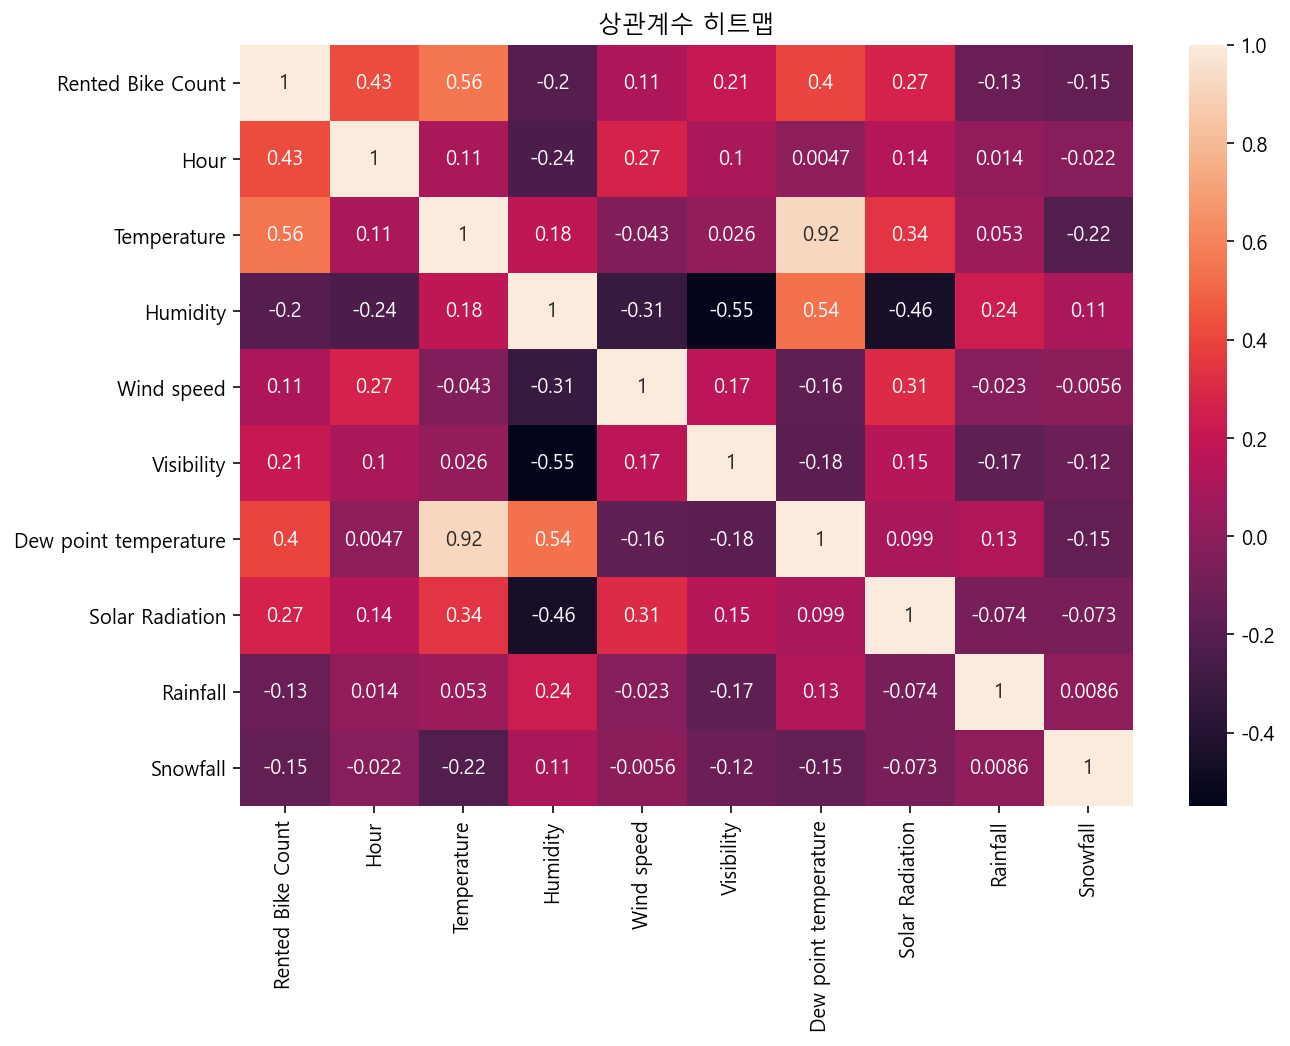

In [316]:
# 상관계수 히트맵 시각화
plt.figure(figsize=(10,7)) #사이즈 조정
sns.heatmap(data2.corr(), annot=True)
plt.title('상관계수 히트맵')

- 온도, 대여시간대, 이슬점 순으로 자전거 대여량과 상관관계가 뚜렷하게 나타난다.
- 온도와 이슬점 간에 상관관계는 0.92로 강한 양의 상관관계를 보인다.
- 습도와 이슬점 간에 상관관계는 0.54로 뚜렷한 양의 상관관계를 보인다.
- 습도와 가시거리 간에 상관관계는 -0.55로 뚜렷한 음의 상관관계를 보인다. 
- 습도와 일사량 간에 상관관계는 -0.46으로 뚜렷한 음의 상관관계를 보인다.

## Hour(대여 시간)

In [227]:
data2['Hour'].value_counts().sort_index() #0시부터 23시까지 있음

0     352
1     352
2     352
3     352
4     352
5     352
6     352
7     353
8     353
9     353
10    353
11    353
12    353
13    353
14    353
15    353
16    353
17    353
18    353
19    353
20    353
21    353
22    353
23    353
Name: Hour, dtype: int64

In [228]:
#범주형 변수로 변수 변환
data2.Hour = data2.Hour.astype('category')
data2.Hour.dtype

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23],
                 ordered=False)

Text(0, 0.5, '자전거 대여량')

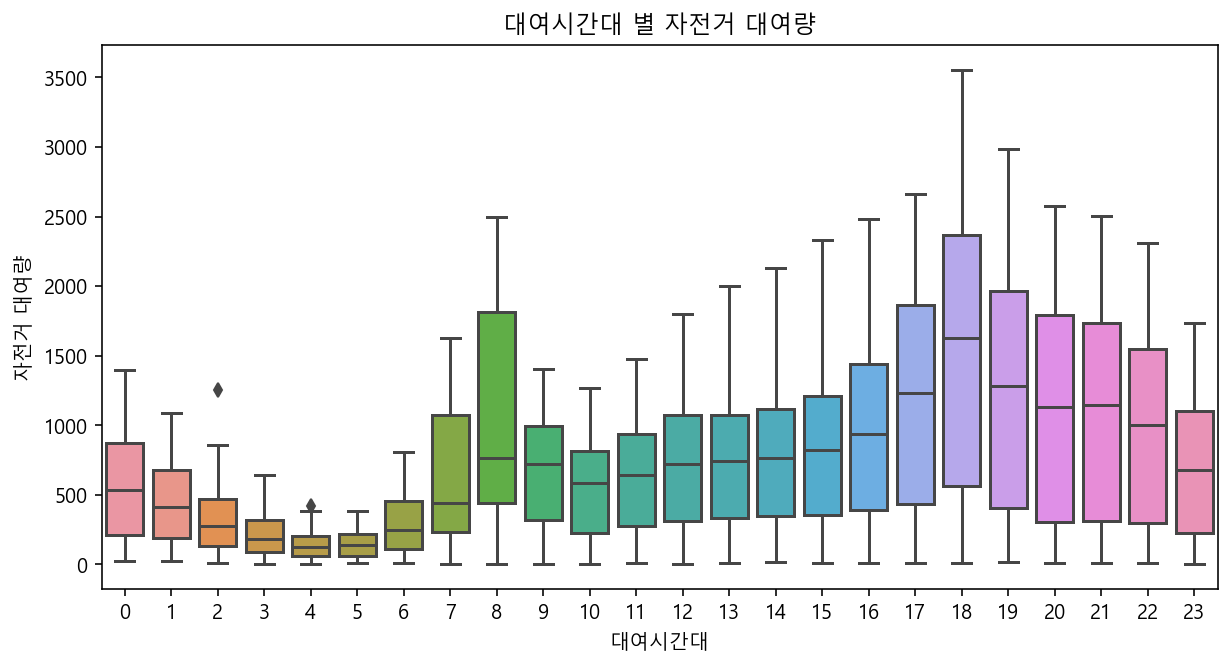

In [246]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 박스플롯
plt.figure(figsize=(10,5))
sns.boxplot(x='Hour', y='Rented Bike Count', data=data2)
plt.title('대여시간대 별 자전거 대여량')
plt.xlabel('대여시간대')
plt.ylabel('자전거 대여량')

# 박스플롯을 통해 중위수가 가장 높은 대여시간대는 18시임을 알 수 있다. 
# 대여량의 최댓값이 있는 시간대 역시 18시이다.

In [237]:
# 평균 자전거 대여량과의 관계 살펴보기
print(data2.groupby('Hour').mean()['Rented Bike Count'].sort_values(ascending=False)) #출퇴근시간대 평균대여량이 높게 나타남.

Hour
18    1554.016997
19    1235.776204
17    1177.212465
20    1105.303116
21    1066.512748
8     1050.229462
16     962.257790
22     954.167139
15     857.373938
14     784.620397
13     758.172805
12     723.218130
23     693.940510
9      667.943343
7      626.606232
11     621.277620
0      561.457386
10     545.764873
1      441.923295
2      312.769886
6      298.184659
3      210.840909
5      144.218750
4      137.488636
Name: Rented Bike Count, dtype: float64


In [238]:
# 시간대별 평균대여량을 data_mean_hour이라는 새로운 데이터프레임에 저장 
data_mean_hour = pd.DataFrame(data2.groupby('Hour').mean()['Rented Bike Count'])
data_mean_hour = data_mean_hour.reset_index()
data_mean_hour

,Hour,Rented Bike Count
0,0,561.457386
1,1,441.923295
2,2,312.769886
3,3,210.840909
4,4,137.488636
5,5,144.218750
6,6,298.184659
7,7,626.606232
8,8,1050.229462
9,9,667.943343


Text(0, 0.5, '자전거 평균 대여량')

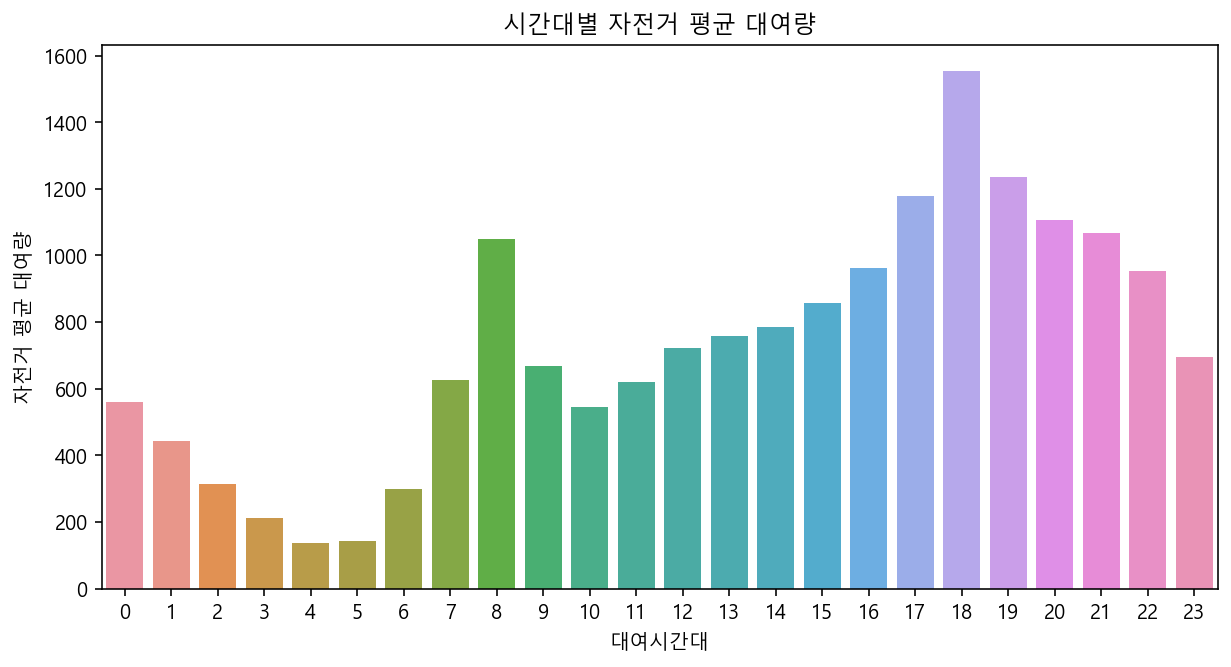

In [239]:
# 시각화 : 막대그래프
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='Rented Bike Count', data=data_mean_hour)
plt.title('시간대별 자전거 평균 대여량')
plt.xlabel('대여시간대')
plt.ylabel('자전거 평균 대여량')

- 자전거 대여량의 중위수가 가장 높은 대여시간대는 18시임을 알 수 있다.
- 대여량의 최댓값이 있는 시간대 역시 18시이다.
- 출퇴근시간대인 18시, 19시, 17시, 20시, 21시, 8시 순으로 평균 자전거 대여량이 높게 나타남.

## Temperature(기온)

Text(-1.8250000000000028, 0.5, '자전거 대여량')

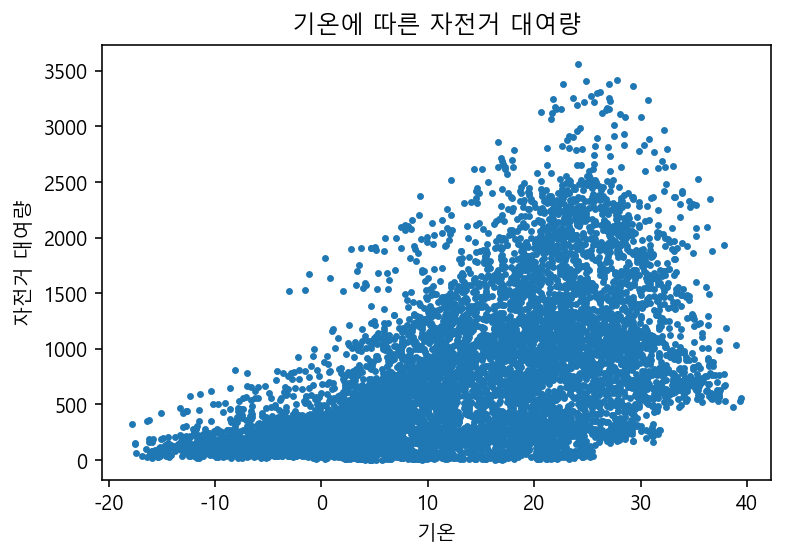

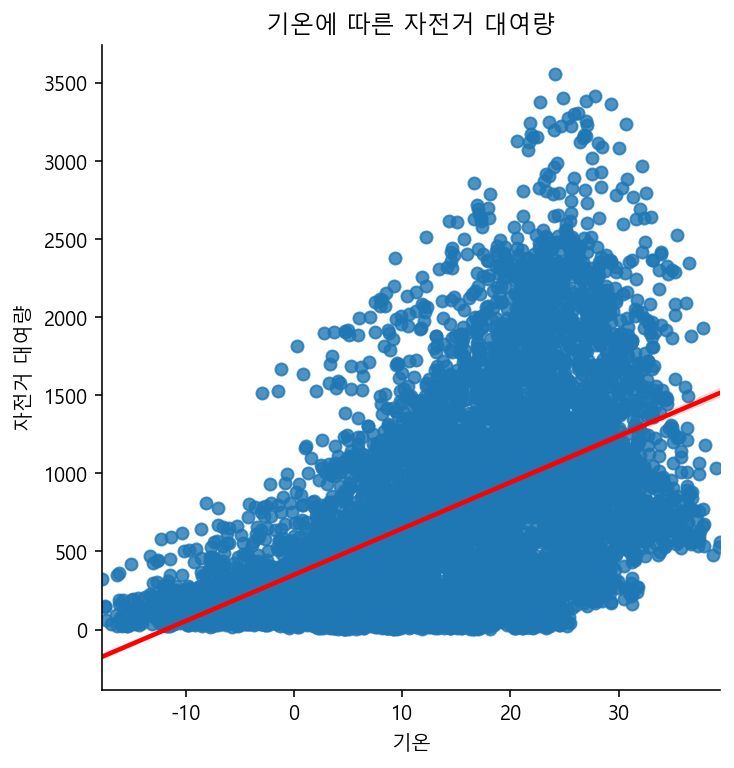

In [249]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data2.Temperature, data2['Rented Bike Count'], s=6)
plt.title('기온에 따른 자전거 대여량')
plt.xlabel('기온')
plt.ylabel('자전거 대여량')

sns.lmplot(x='Temperature', y='Rented Bike Count', data=data2, line_kws={'color': 'red'})
plt.title('기온에 따른 자전거 대여량')
plt.xlabel('기온')
plt.ylabel('자전거 대여량')

# 20도 이상 30도 미만의 경우 대여량의 최댓값이 위치해 있다.

-17.8
39.4


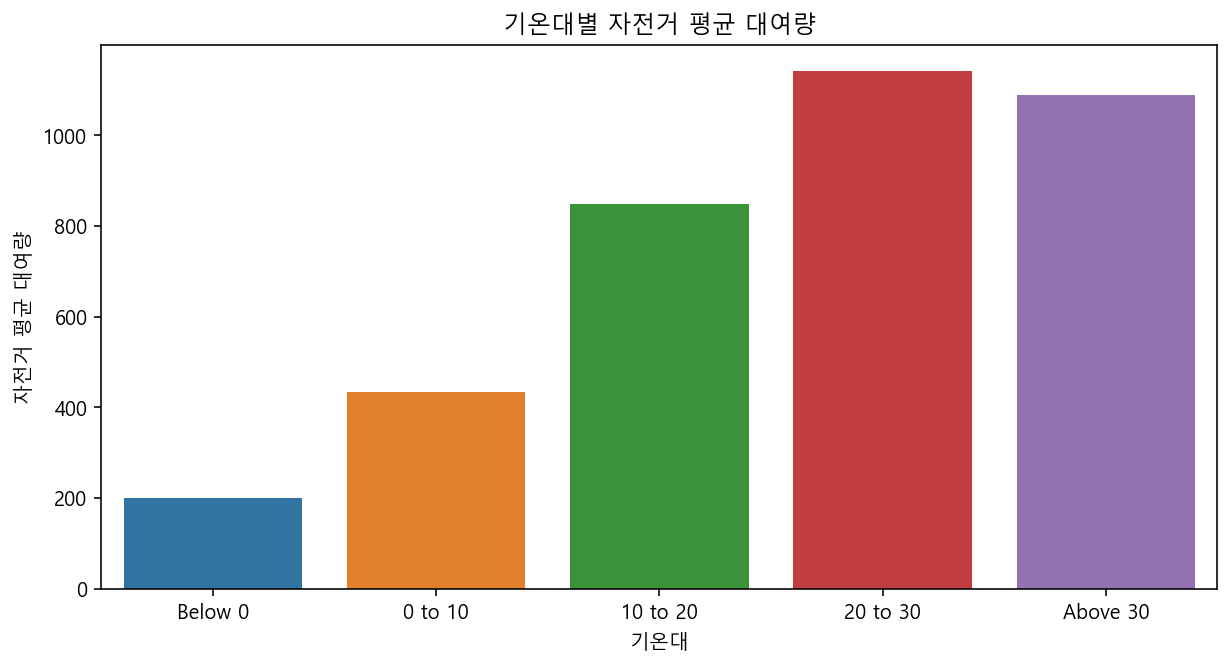

Text(0, 0.5, '자전거 평균 대여량')

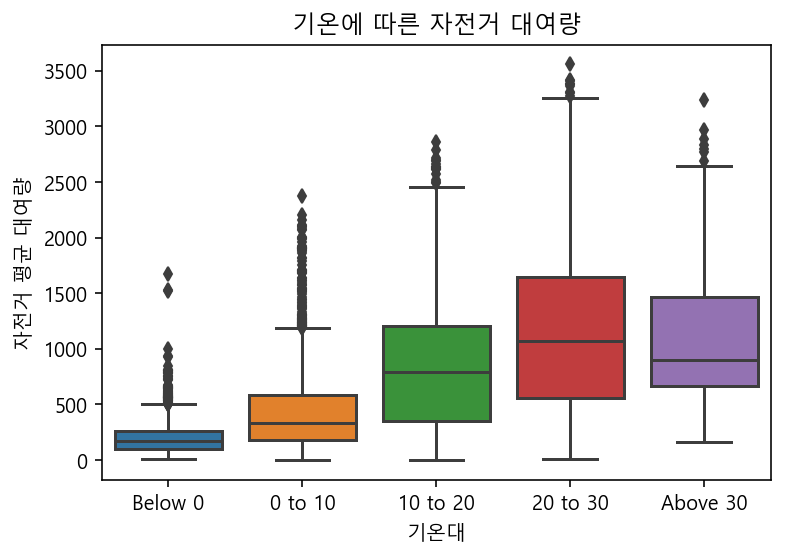

In [253]:
# 기온을 범주화하여 분석해보기
print(min(data2['Temperature']))
print(max(data2['Temperature']))

# -20도 이상 0도 미만, 0도 이상 10도 미만, 10도 이상 20도 미만, 20도 이상 30도 미만, 30도 이상으로 구간을 나누기
bins = [-float('inf'), 0, 10, 20, 30, float('inf')]
labels = ['Below 0', '0 to 10', '10 to 20', '20 to 30', 'Above 30'] # 각 구간의 라벨 설정
data2['Temp_group'] = pd.cut(data2['Temperature'], bins=bins, labels=labels, include_lowest=True)

# 기온그룹별 평균 자전거 대여량 계산
data_temp_group = data2.groupby('Temp_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Temp_group', y='Rented Bike Count', data=data_temp_group)
plt.title('기온대별 자전거 평균 대여량')
plt.xlabel('기온대')
plt.ylabel('자전거 평균 대여량')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Temp_group', y='Rented Bike Count', data=data2)
plt.title('기온에 따른 자전거 대여량')
plt.xlabel('기온대')
plt.ylabel('자전거 평균 대여량')

# 박스플롯을 통해 대여량의 중위수가 '20 to 30' 그룹까지는 증가하지만, 30도가 넘어가면 약간 감소하는 것을 확인할 수 있음.

- 기온이 높아짐에 따라 대여량이 증가하는 추세를 보인다. (30도 이상이 되면 약간 감소한다.)
- 20도 이상 30도 미만 그룹의 경우 평균 대여량이 가장 높게 나타난다.

## Humidity(습도)

Text(-1.8250000000000028, 0.5, '자전거 대여량')

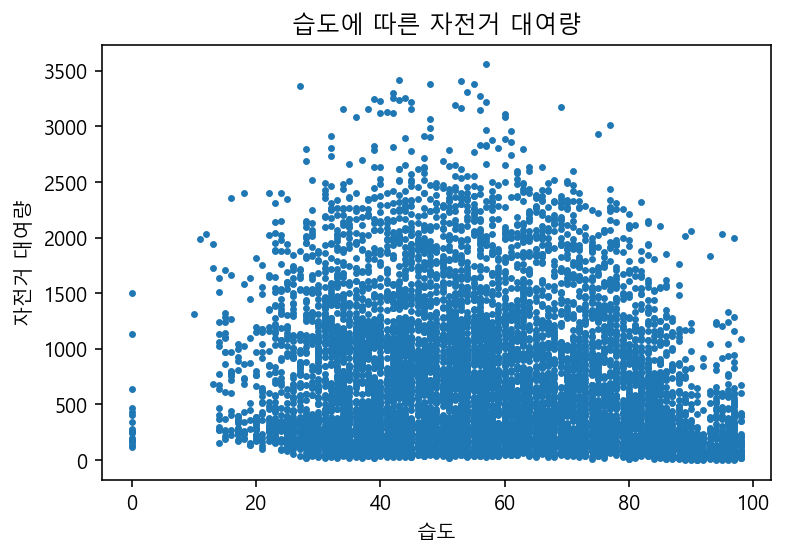

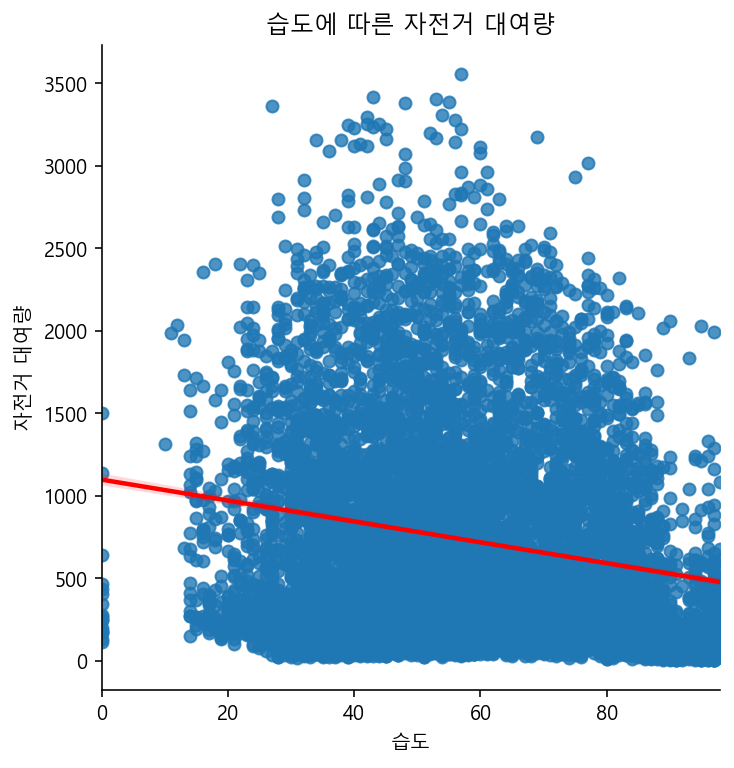

In [250]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data2.Humidity, data2['Rented Bike Count'], s=6)
plt.title('습도에 따른 자전거 대여량')
plt.xlabel('습도')
plt.ylabel('자전거 대여량')

sns.lmplot(x='Humidity', y='Rented Bike Count', data=data2, line_kws={'color': 'red'})
plt.title('습도에 따른 자전거 대여량')
plt.xlabel('습도')
plt.ylabel('자전거 대여량')

# 습도와 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

0
98


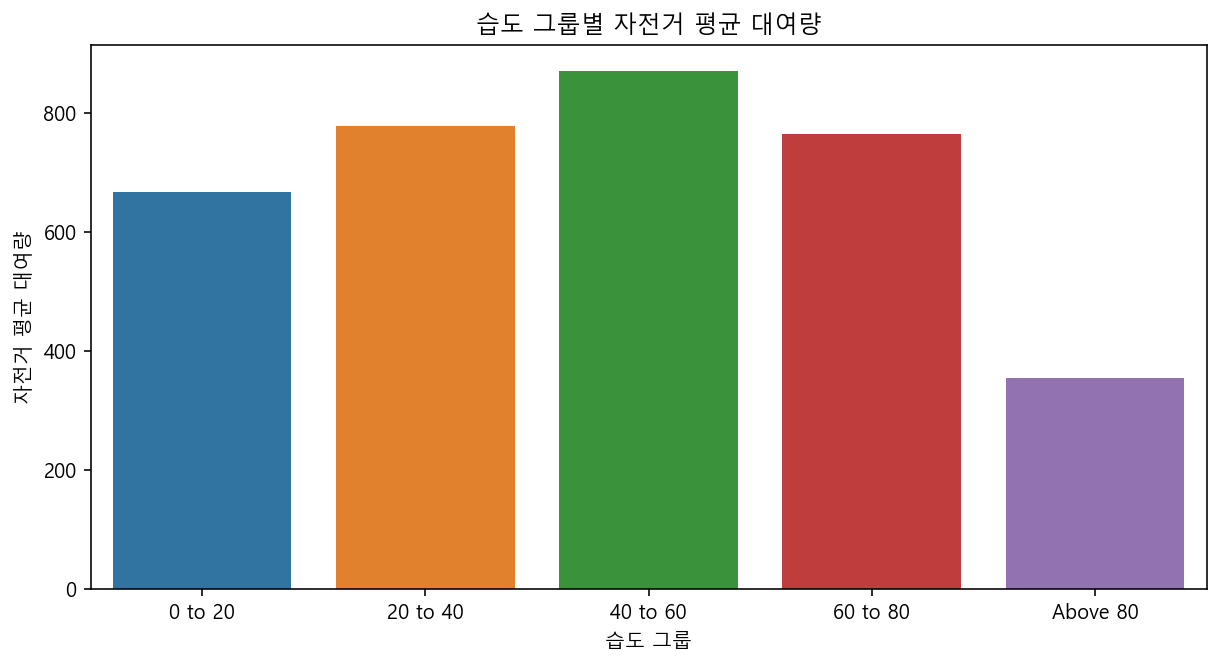

Text(0, 0.5, '자전거 평균 대여량')

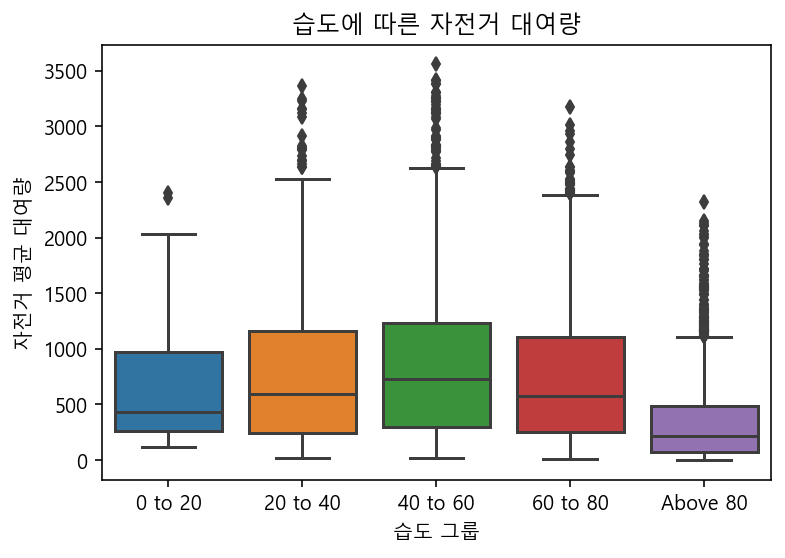

In [252]:
# 습도 범주화하여 분석해보기
print(min(data2['Humidity']))
print(max(data2['Humidity']))

# 0% 이상 20% 미만, 20% 이상 40% 미만, 40% 이상 60% 미만, 60% 이상 80% 미만, 80% 이상으로 구간을 나누기
bins = [-float('inf'), 20, 40, 60, 80, float('inf')]
labels = ['0 to 20', '20 to 40', '40 to 60', '60 to 80', 'Above 80'] # 각 구간의 라벨 설정
data2['Humid_group'] = pd.cut(data2['Humidity'], bins=bins, labels=labels, include_lowest=True)

# 습도그룹별 평균 자전거 대여량 계산
data_humid_group = data2.groupby('Humid_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Humid_group', y='Rented Bike Count', data=data_humid_group)
plt.title('습도 그룹별 자전거 평균 대여량')
plt.xlabel('습도 그룹')
plt.ylabel('자전거 평균 대여량')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Humid_group', y='Rented Bike Count', data=data2)
plt.title('습도에 따른 자전거 대여량')
plt.xlabel('습도 그룹')
plt.ylabel('자전거 평균 대여량')

# 박스플롯을 통해 0%~80% 까지는 대여량의 중위수에 큰 차이가 나지 않는다. 그러나 80%가 넘어가면 중위수가 감소한 것을 확인할 수 있다.

- 0%~ 80% 습도일 때는 자전거 대여량에 영향을 크게 미치지 않는다. (80% 이상인 경우 대여량은 감소한다.)
- 범주화하여 그룹별로 비교하였을 때 적정 습도인 40%~60% 그룹의 평균 대여량이 가장 높게 나타난다.

## Wind speed(풍속)

Text(-1.8250000000000028, 0.5, '자전거 대여량')

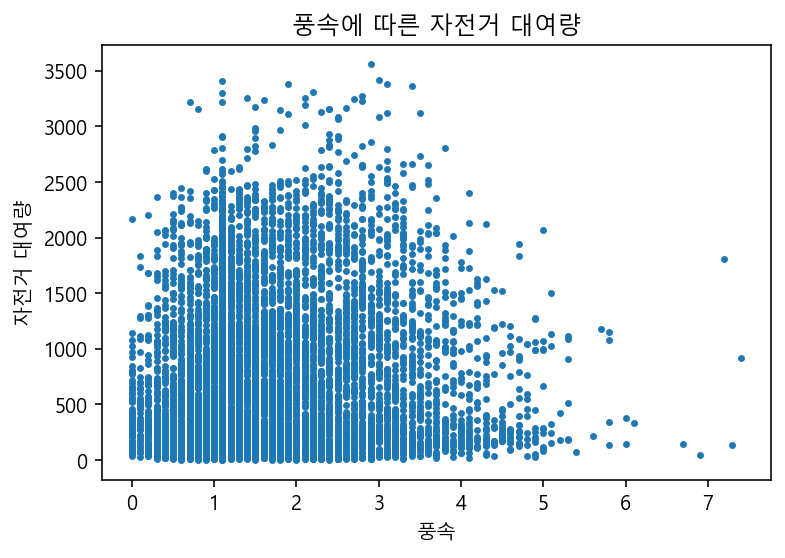

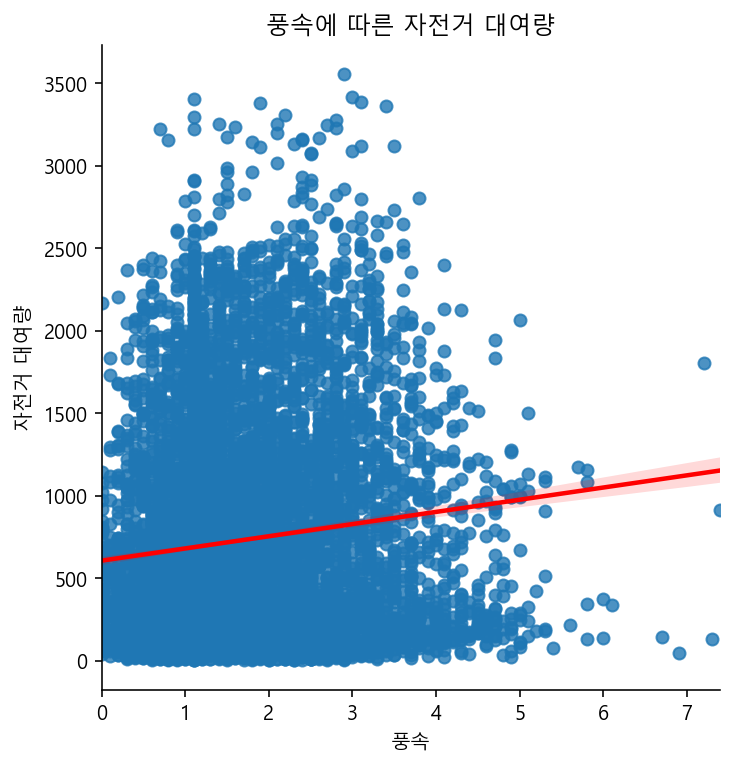

In [317]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data2['Wind speed'], data2['Rented Bike Count'], s=6)
plt.title('풍속에 따른 자전거 대여량')
plt.xlabel('풍속')
plt.ylabel('자전거 대여량')

sns.lmplot(x='Wind speed', y='Rented Bike Count', data=data2, line_kws={'color': 'red'})
plt.title('풍속에 따른 자전거 대여량')
plt.xlabel('풍속')
plt.ylabel('자전거 대여량')
# 풍속과 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

0.0
7.4


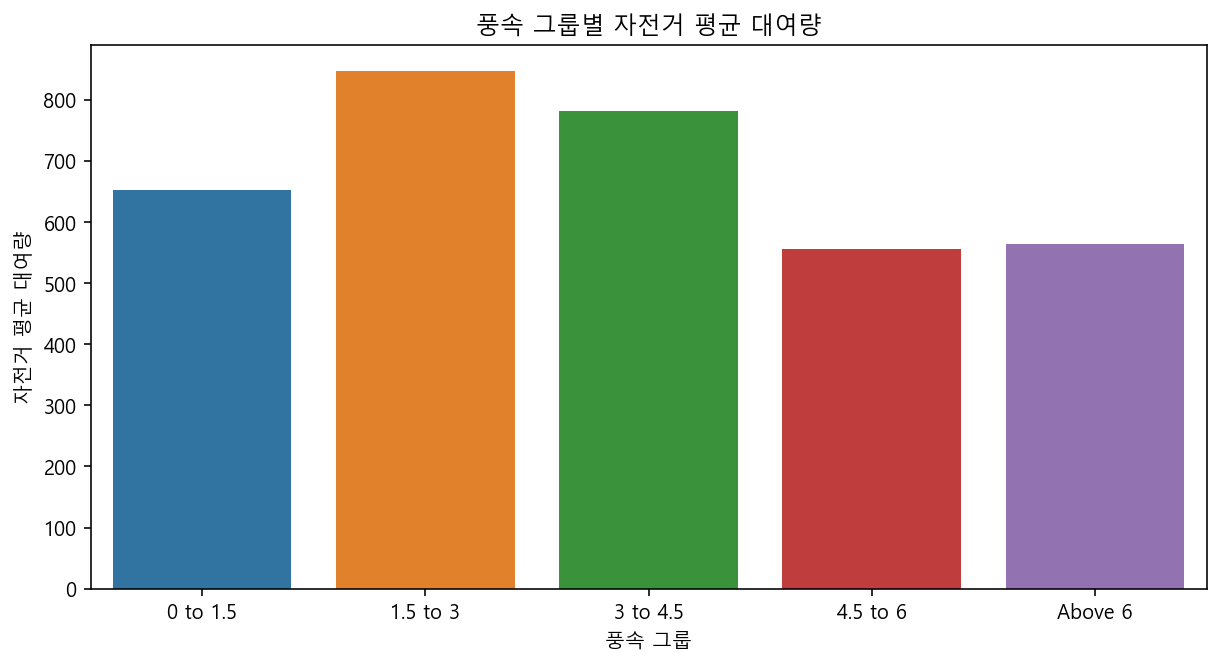

Text(0, 0.5, '자전거 평균 대여량')

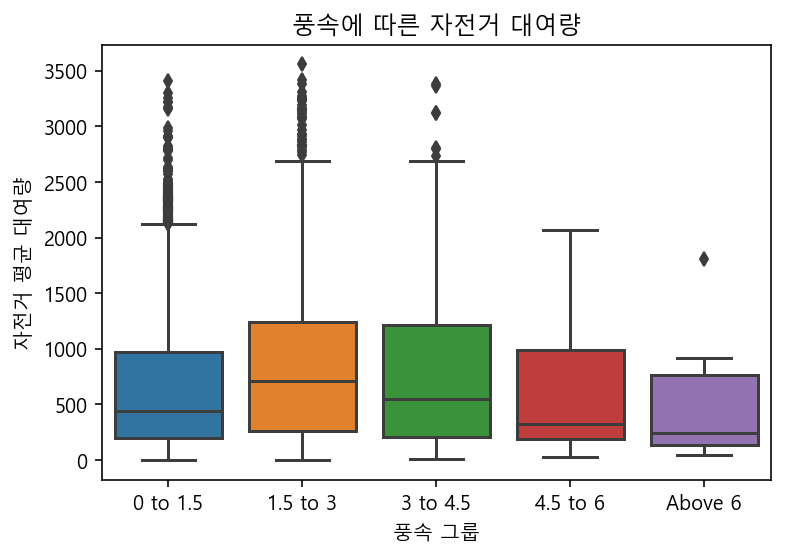

In [323]:
# 풍속을 범주화하여 분석해보기
print(min(data2['Wind speed'])) 
print(max(data2['Wind speed'])) 

# 0 이상 1.5 미만, 1.5 이상 3 미만, 3 이상 4.5 미만, 4.5 이상 6 미만, 6 이상으로 구간을 나누기
bins = [-float('inf'), 1.5, 3, 4.5, 6, float('inf')]
labels = ['0 to 1.5', '1.5 to 3', '3 to 4.5', '4.5 to 6', 'Above 6'] # 각 구간의 라벨 설정
data2['Wspeed_group'] = pd.cut(data2['Wind speed'], bins=bins, labels=labels, include_lowest=True)

# 풍속그룹별 평균 자전거 대여량 계산
data_wspeed_group = data2.groupby('Wspeed_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Wspeed_group', y='Rented Bike Count', data=data_wspeed_group)
plt.title('풍속 그룹별 자전거 평균 대여량')
plt.xlabel('풍속 그룹')
plt.ylabel('자전거 평균 대여량')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Wspeed_group', y='Rented Bike Count', data=data2)
plt.title('풍속에 따른 자전거 대여량')
plt.xlabel('풍속 그룹')
plt.ylabel('자전거 평균 대여량')

# 막대그래프를 통해 풍속이 '1.5 to 3'인 경우 평균 대여량이 가장 높은 것을 확인할 수 있다.
# 박스플롯을 통해 풍속이 '1.5 to 3'인 경우 대여량의 중위수가 가장 높은 것을 확인할 수 있다.

- 자전거 대여량에 영향을 크게 미치지 않는다.
- 범주화하여 분석한 결과 풍속이 1.5이상 3미만인 경우 평균 대여량이 가장 높게 나타났다.

## Visibility(가시거리)

Text(-1.8250000000000028, 0.5, '자전거 대여량')

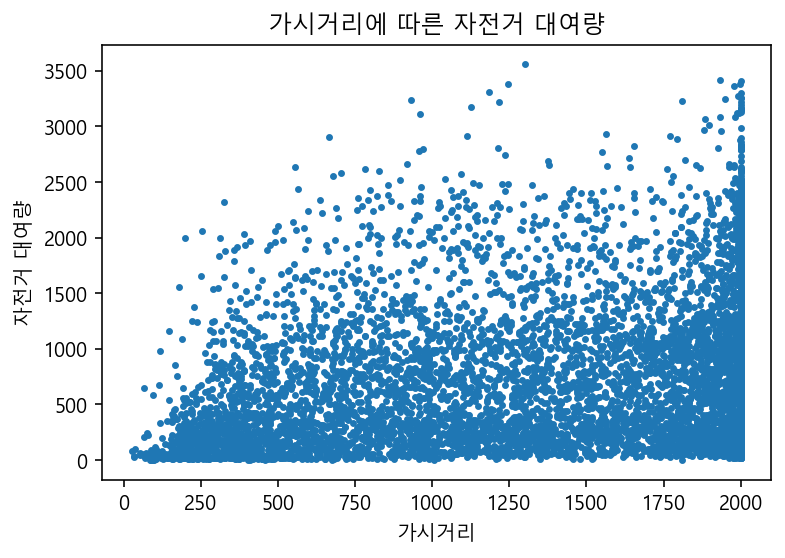

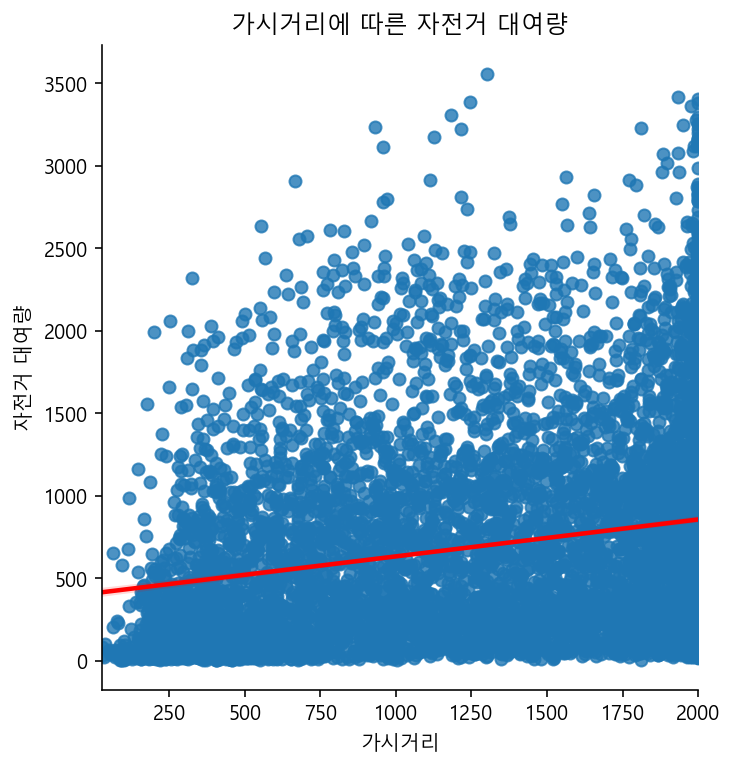

In [320]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data2['Visibility'], data2['Rented Bike Count'], s=6)
plt.title('가시거리에 따른 자전거 대여량')
plt.xlabel('가시거리')
plt.ylabel('자전거 대여량')

sns.lmplot(x='Visibility', y='Rented Bike Count', data=data2, line_kws={'color': 'red'})
plt.title('가시거리에 따른 자전거 대여량')
plt.xlabel('가시거리')
plt.ylabel('자전거 대여량')

# 가시성과 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

27
2000


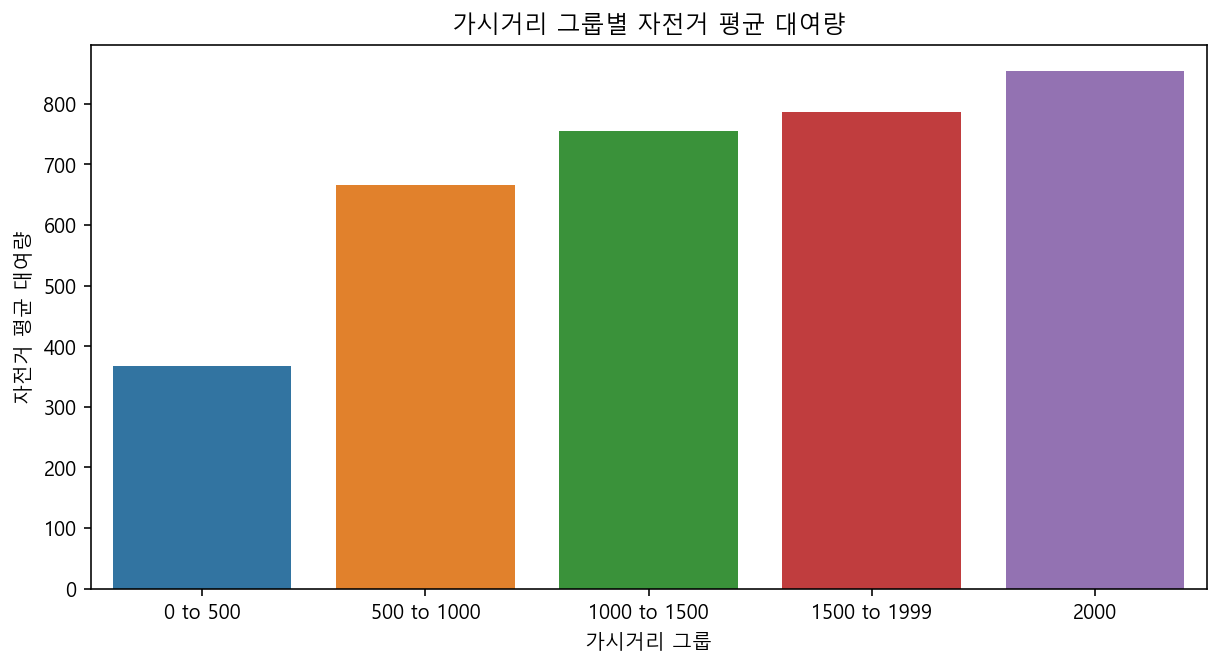

Text(0, 0.5, '자전거 평균 대여량')

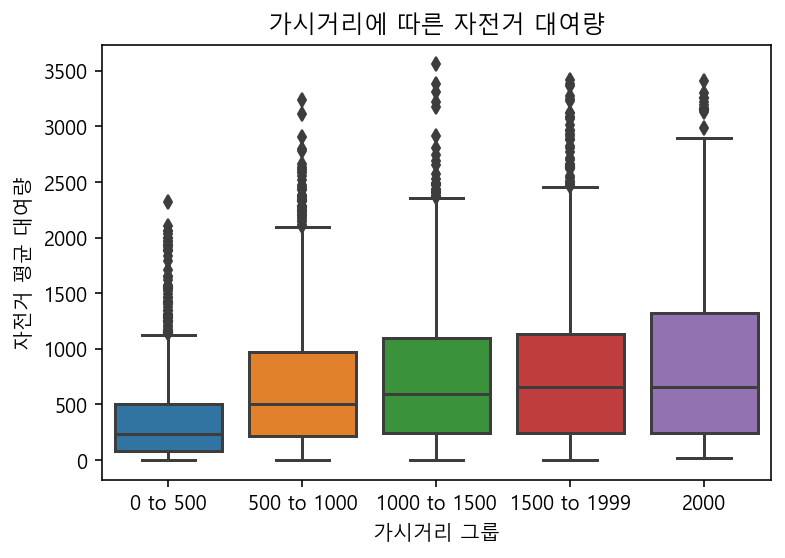

In [322]:
# 가시성을 범주화하여 분석해보기
print(min(data2['Visibility'])) 
print(max(data2['Visibility'])) 

# 0 이상 500 미만, 500 이상 1000 미만, 1000 이상 1500 미만, 1500 이상 2000 미만, 2000으로 구간을 나누기
bins = [-float('inf'), 500, 1000, 1500, 1999, float('inf')]
labels = ['0 to 500', '500 to 1000', '1000 to 1500', '1500 to 1999', '2000'] # 각 구간의 라벨 설정
data2['Vis_group'] = pd.cut(data2['Visibility'], bins=bins, labels=labels, include_lowest=True)

# 가시성그룹별 평균 자전거 대여량 계산
data_vis_group = data2.groupby('Vis_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Vis_group', y='Rented Bike Count', data=data_vis_group)
plt.title('가시거리 그룹별 자전거 평균 대여량')
plt.xlabel('가시거리 그룹')
plt.ylabel('자전거 평균 대여량')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Vis_group', y='Rented Bike Count', data=data2)
plt.title('가시거리에 따른 자전거 대여량')
plt.xlabel('가시거리 그룹')
plt.ylabel('자전거 평균 대여량')

# 가시성이 2000이었을 때 평균 대여량이 가장 높음
# '0 to 500' 그룹을 제외하고는 가시성에 따른 대여량의 중위수가 모두 비슷하게 나타남

- 자전거 대여량에 크게 영향을 미치지 않는다.
- 범주화하여 분석한 결과, 가시성이 2000일 때 평균 대여량이 가장 높게 나타났다.

## Dew point temperature(이슬점)

Text(-1.8250000000000028, 0.5, '자전거 대여량')

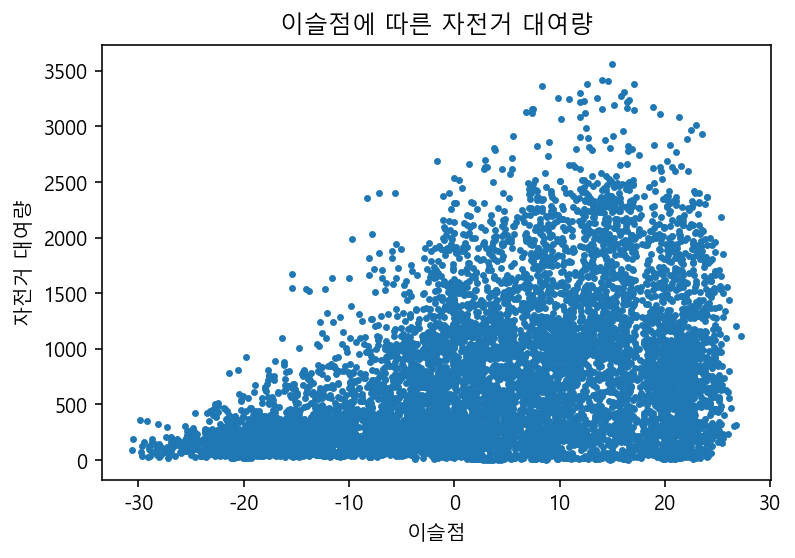

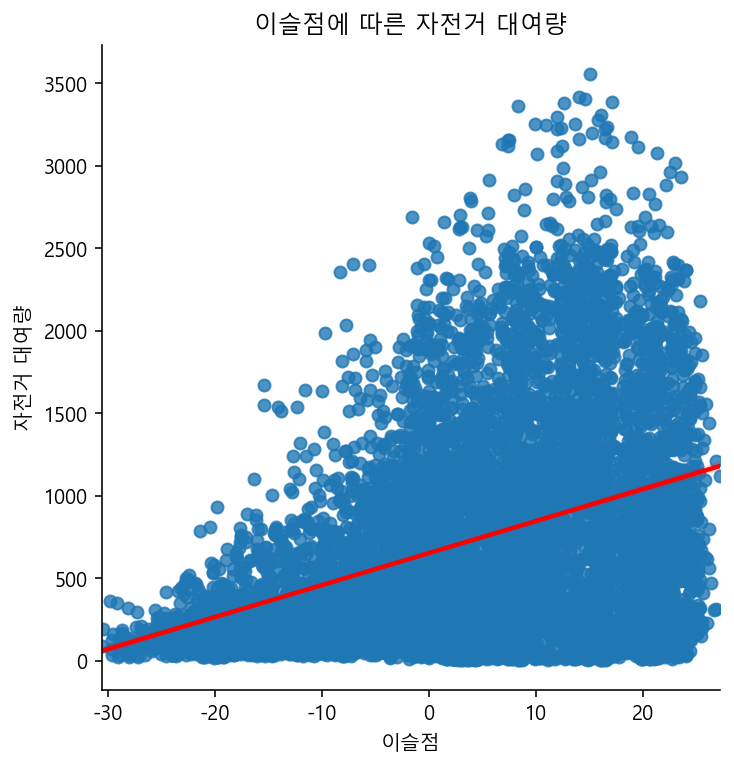

In [325]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data2['Dew point temperature'], data2['Rented Bike Count'], s=6)
plt.title('이슬점에 따른 자전거 대여량')
plt.xlabel('이슬점')
plt.ylabel('자전거 대여량')

sns.lmplot(x='Dew point temperature', y='Rented Bike Count', data=data2, line_kws={'color': 'red'})
plt.title('이슬점에 따른 자전거 대여량')
plt.xlabel('이슬점')
plt.ylabel('자전거 대여량')

# 이슬점 온도가 높아졌을 때 대여량이 증가하는 경우가 종종 나타난다. #약한 양의 상관관계를 보인다

-30.6
27.2


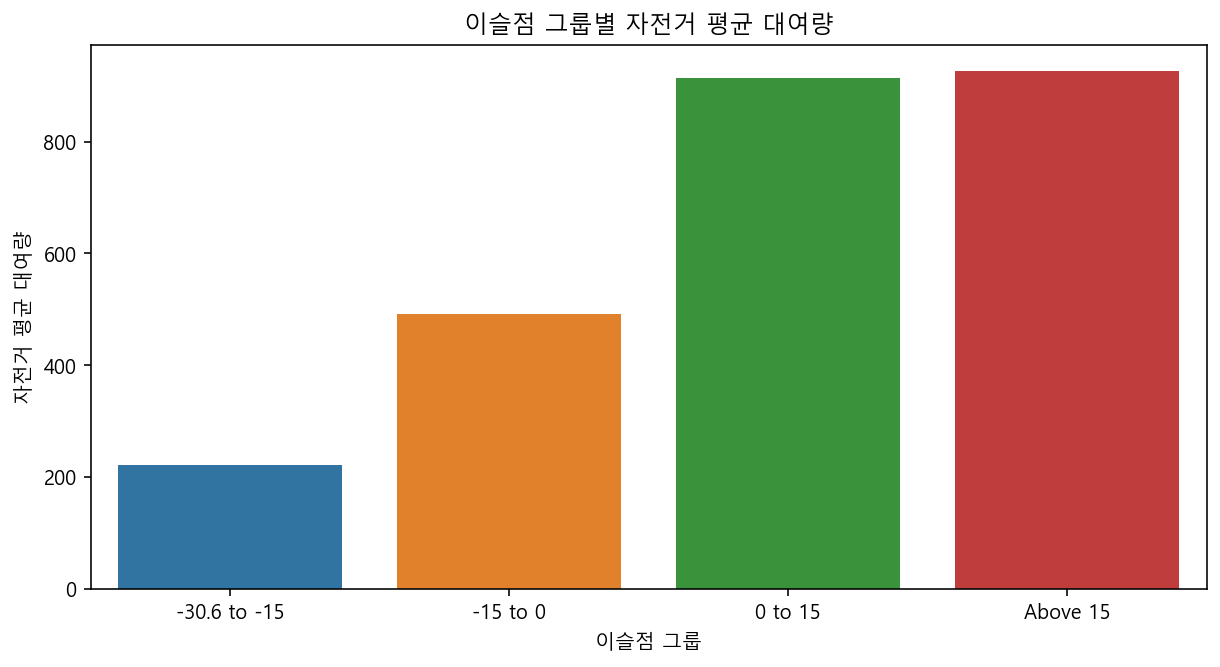

Text(0, 0.5, '자전거 평균 대여량')

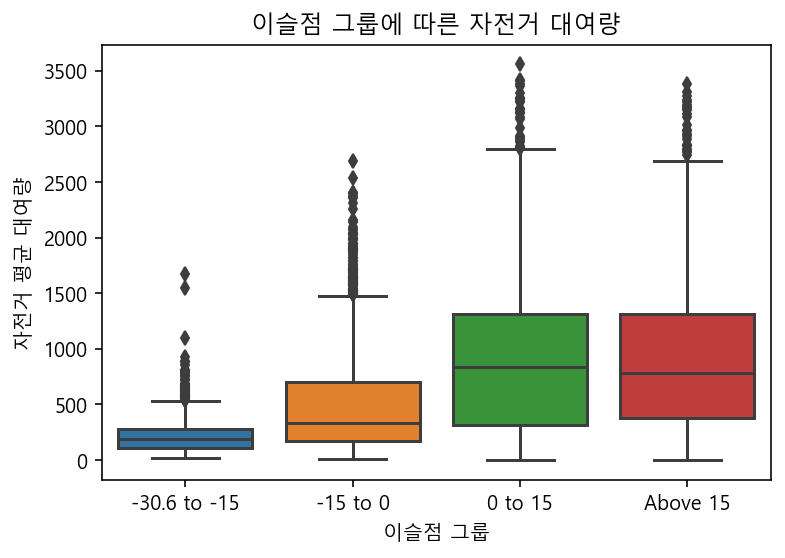

In [326]:
# 이슬점 온도를 범주화해서 분석해보기
print(min(data2['Dew point temperature'])) 
print(max(data2['Dew point temperature'])) 

# -30.6도 이상 -15도 미만, -15도 이상 0도 미만, 0도 이상 15도 미만, 15도 이상으로 구간을 나누기
bins = [-float('inf'),-15, 0, 15, float('inf')]
labels = ['-30.6 to -15', '-15 to 0', '0 to 15', 'Above 15'] # 각 구간의 라벨 설정
data2['Dew_group'] = pd.cut(data2['Dew point temperature'], bins=bins, labels=labels, include_lowest=True)

# 이슬점 온도 그룹별 평균 자전거 대여량 계산
data_dew_group = data2.groupby('Dew_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Dew_group', y='Rented Bike Count', data=data_dew_group)
plt.title('이슬점 그룹별 자전거 평균 대여량')
plt.xlabel('이슬점 그룹')
plt.ylabel('자전거 평균 대여량')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Dew_group', y='Rented Bike Count', data=data2)
plt.title('이슬점 그룹에 따른 자전거 대여량')
plt.xlabel('이슬점 그룹')
plt.ylabel('자전거 평균 대여량')

- 자전거 대여량과의 약한 양의 상관관계
- 범주화 분석 결과, 0도 이상일 때 평균 대여량이 높게 나타났다.

## Solar Radiation(일사량)

Text(-1.8250000000000028, 0.5, '자전거 대여량')

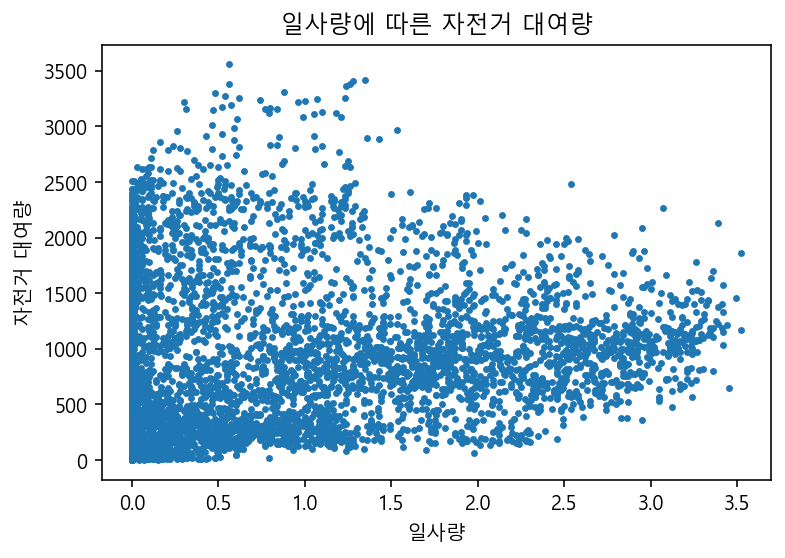

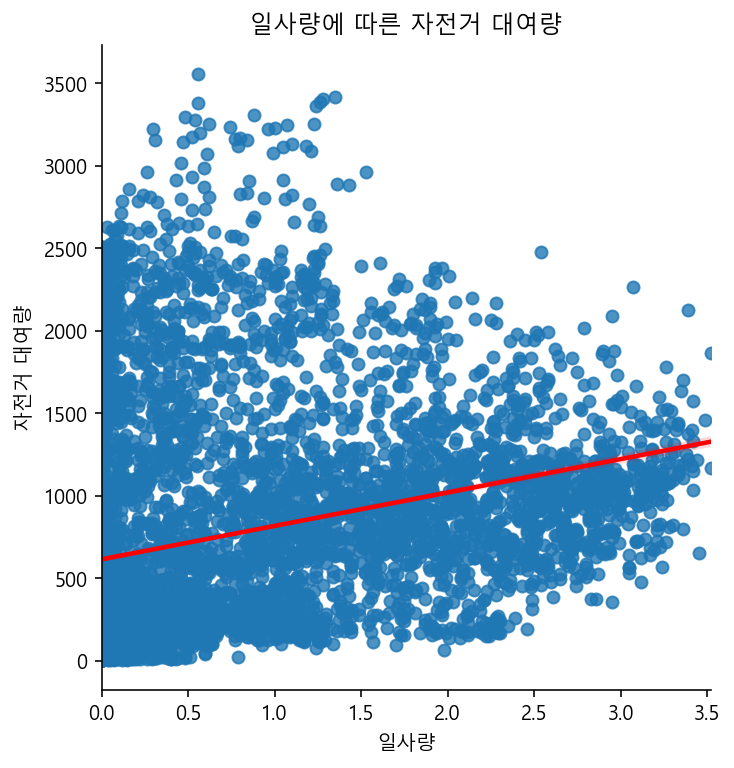

In [327]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data2['Solar Radiation'], data2['Rented Bike Count'], s=6)
plt.title('일사량에 따른 자전거 대여량')
plt.xlabel('일사량')
plt.ylabel('자전거 대여량')

sns.lmplot(x='Solar Radiation', y='Rented Bike Count', data=data2, line_kws={'color': 'red'})
plt.title('일사량에 따른 자전거 대여량')
plt.xlabel('일사량')
plt.ylabel('자전거 대여량')

# 태양 복사열과 자전거 대여량 간에 뚜렷한 선형관계가 나타나지 않음.

0.0
3.52


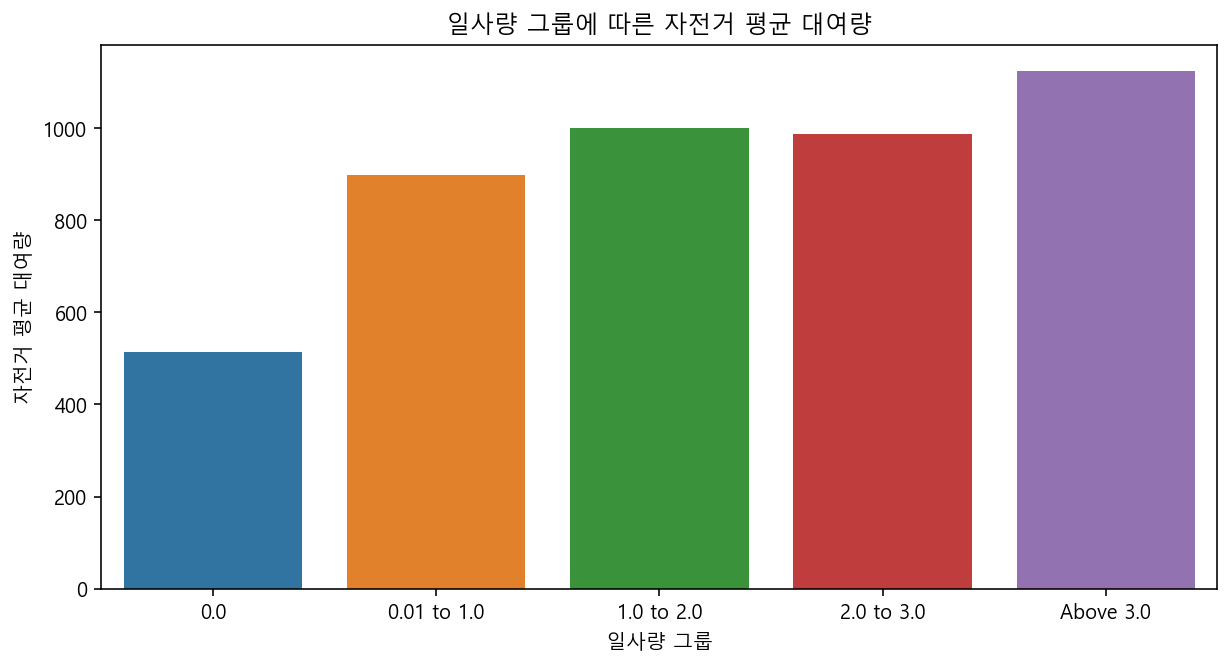

Text(0, 0.5, '자전거 평균 대여량')

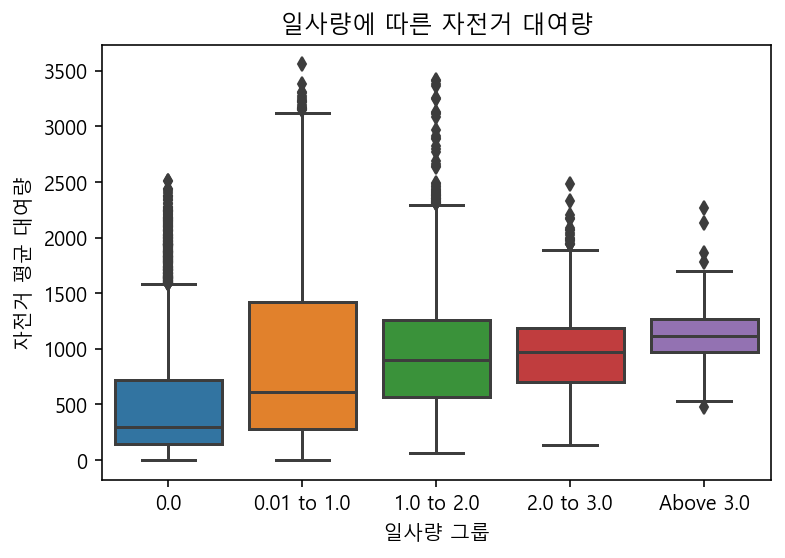

In [328]:
# 일사량을 범주화해서 분석해보기
print(min(data2['Solar Radiation'])) 
print(max(data2['Solar Radiation'])) 

# 0.0,0.01 이상 1.0 미만, 1.0 이상 2.0 미만, 2.0 이상 3.0 미만 3.0 이상으로 구간을 나누기
bins = [0.0, 0.01, 1.0, 2.0, 3.0, float('inf')]
labels = ['0.0', '0.01 to 1.0', '1.0 to 2.0', '2.0 to 3.0', 'Above 3.0'] # 각 구간의 라벨 설정
data2['Sol_group'] = pd.cut(data2['Solar Radiation'], bins=bins, labels=labels, include_lowest=True)

# 일사량 그룹별 평균 자전거 대여량 계산
data_sol_group = data2.groupby('Sol_group')['Rented Bike Count'].mean().reset_index()

# 시각화 : 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(x='Sol_group', y='Rented Bike Count', data=data_sol_group)
plt.title('일사량 그룹에 따른 자전거 평균 대여량')
plt.xlabel('일사량 그룹')
plt.ylabel('자전거 평균 대여량')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Sol_group', y='Rented Bike Count', data=data2)
plt.title('일사량에 따른 자전거 대여량')
plt.xlabel('일사량 그룹')
plt.ylabel('자전거 평균 대여량')

# 일사량이 높아질수록 대여량의 중위수는 증가하는 추세를 보인다.

- 범주화 분석 결과, 태양 복사열이 3.0이상일 때 평균 대여량이 가장 높게 나타났다.
- 태양 복사열이 높아질수록 대여량의 중위수는 증가하는 추세를 보인다.

## Rainfall(강수량)

Text(-5.950000000000003, 0.5, '자전거 대여량')

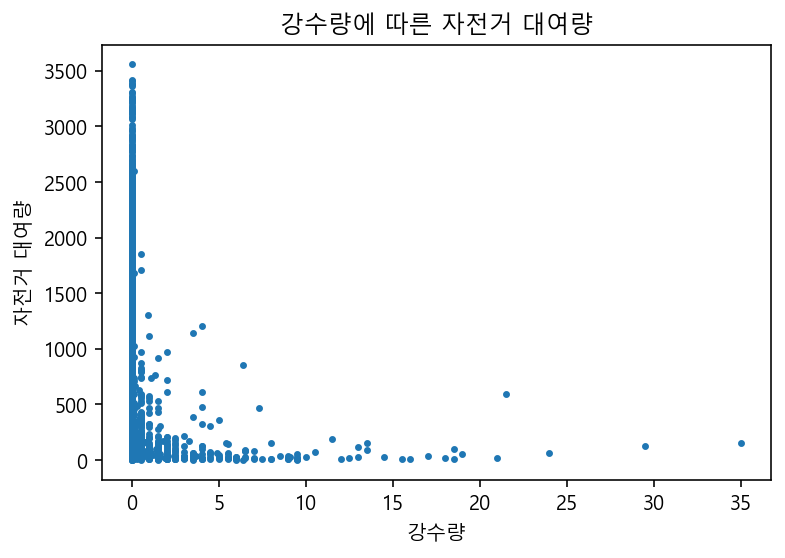

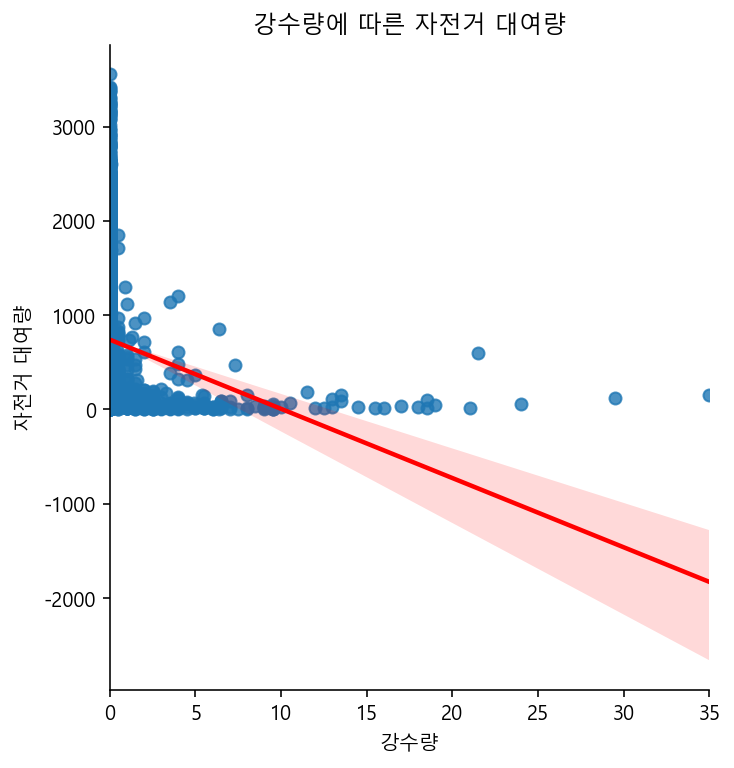

In [329]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data2['Rainfall'], data2['Rented Bike Count'], s=6)
plt.title('강수량에 따른 자전거 대여량')
plt.xlabel('강수량')
plt.ylabel('자전거 대여량')

sns.lmplot(x='Rainfall', y='Rented Bike Count', data=data2, line_kws={'color': 'red'})
plt.title('강수량에 따른 자전거 대여량')
plt.xlabel('강수량')
plt.ylabel('자전거 대여량')

# 강수량이 적은 날에 대여량의 최댓값이 위치해 있다.
# 강수량과 대여량 간에 뚜렷한 선형관계가 나타나지 않는다. 
# 선형관계로 파악하기보다 loess를 사용해보면 어떨까?
# 이차함수 곡선 형태로 비가 오면 급격히 대여량이 감소하므로 비가 오면 사람들이 자전거를 타지 않는다고 해석할 수 있다.

- 대부분이 0의 값을 가짐.
- 자전거 대여량과 뚜렷한 선형관계가 나타나지 않음.

## Snowfall(적설량)

Text(-5.950000000000003, 0.5, '자전거 대여량')

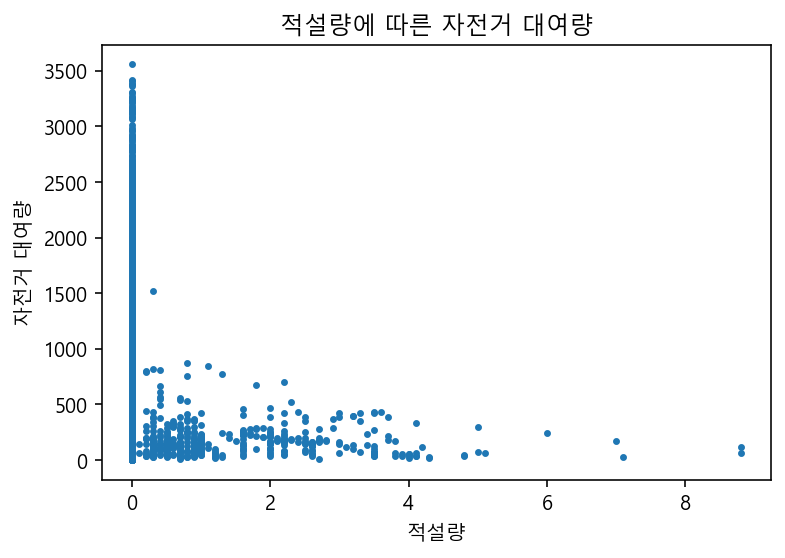

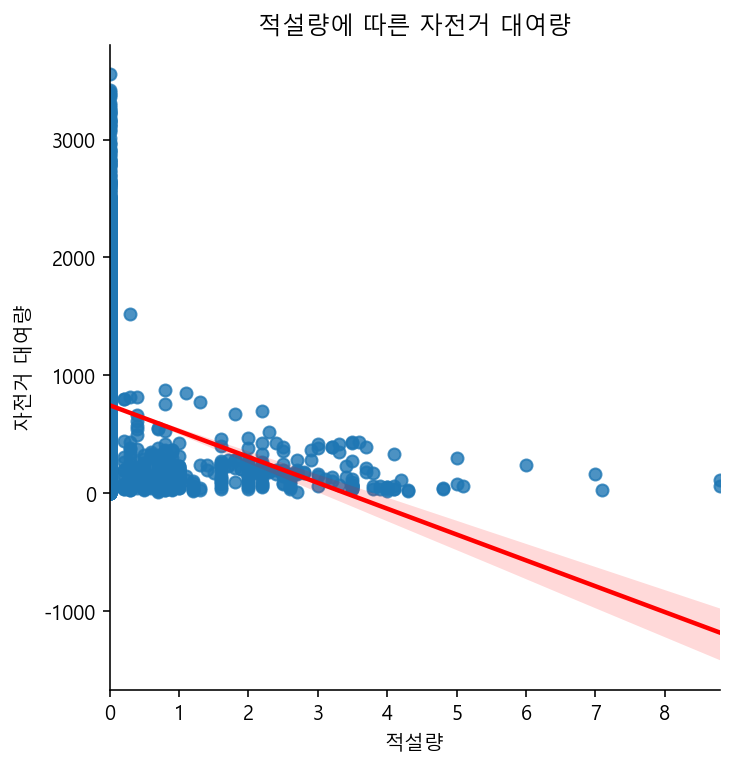

In [331]:
# 자전거 대여량과의 관계 살펴보기
# 시각화 : 산점도
plt.scatter(data2['Snowfall'], data2['Rented Bike Count'], s=6)
plt.title('scatter plot of the number of rented bike by snowfall')
plt.title('적설량에 따른 자전거 대여량')
plt.xlabel('적설량')
plt.ylabel('자전거 대여량')

sns.lmplot(x='Snowfall', y='Rented Bike Count', data=data2, line_kws={'color': 'red'})
plt.title('적설량에 따른 자전거 대여량')
plt.xlabel('적설량')
plt.ylabel('자전거 대여량')

# 적설량이 적은 날에 대여량의 최댓값이 위치해 있다.
# 적설량과 대여량 간에 뚜렷한 선형관계가 나타나지 않는다.
# 선형관계로 파악하기보다 loess를 사용해보면 어떨까?
# 이차함수 곡선 형태로 비가 오면 급격히 대여량이 감소하므로 눈이 오면 사람들이 자전거를 타지 않는다고 해석할 수 있다.

- 대부분이 0의 값을 가짐.
- 자전거 대여량과 뚜렷한 선형관계가 나타나지 않음.

## Seasons(계절)

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64


Text(0, 0.5, '빈도')

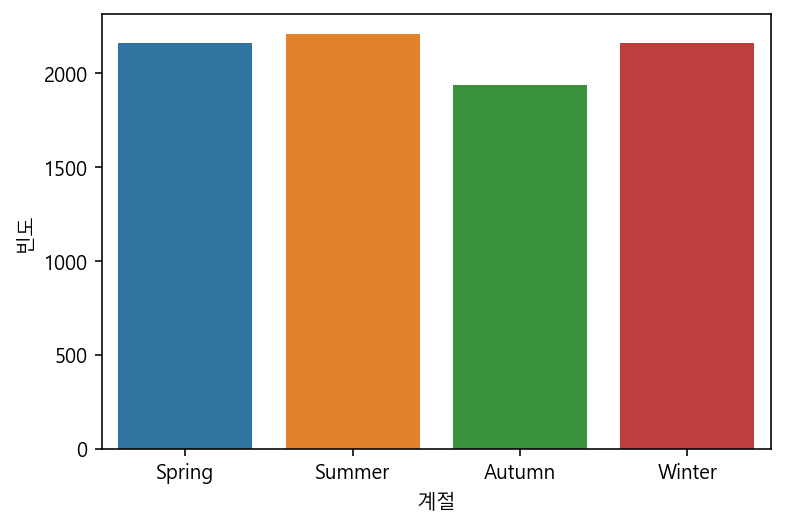

In [332]:
print(data2.Seasons.value_counts())

# 분포 확인하기
# 시각화 : 막대그래프
sns.countplot(x='Seasons', data=data2, order=['Spring','Summer','Autumn','Winter'])
plt.xlabel('계절')
plt.ylabel('빈도')

In [333]:
# 자전거 대여량과의 관계 살펴보기
print(data2.groupby('Seasons').mean()['Rented Bike Count'].sort_values(ascending=False)) 

Seasons
Summer    1034.073370
Autumn     924.110480
Spring     746.254167
Winter     225.541204
Name: Rented Bike Count, dtype: float64


In [334]:
# 계절별 평균대여량을 data_mean_season이라는 새로운 데이터프레임에 저장 
data_mean_season = pd.DataFrame(data2.groupby('Seasons').mean()['Rented Bike Count'])
data_mean_season = data_mean_season.reset_index()
data_mean_season

,Seasons,Rented Bike Count
0,Autumn,924.110480
1,Spring,746.254167
2,Summer,1034.073370
3,Winter,225.541204


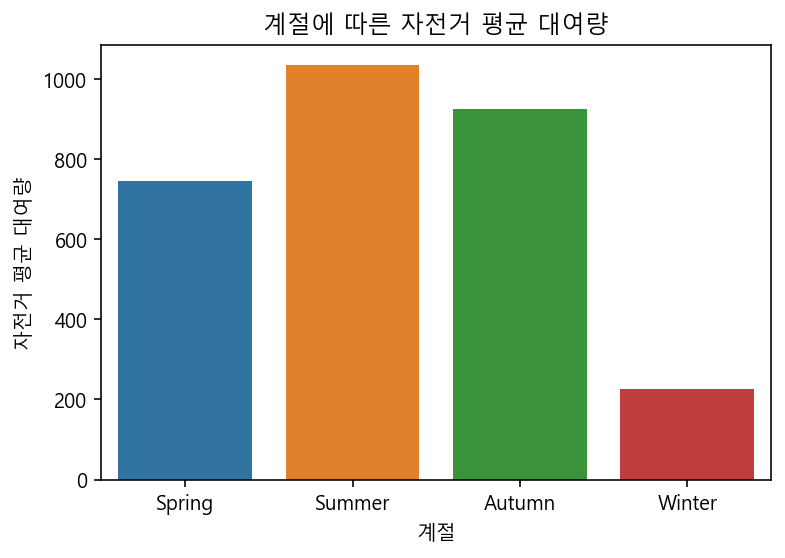

Text(0, 0.5, '자전거 대여량')

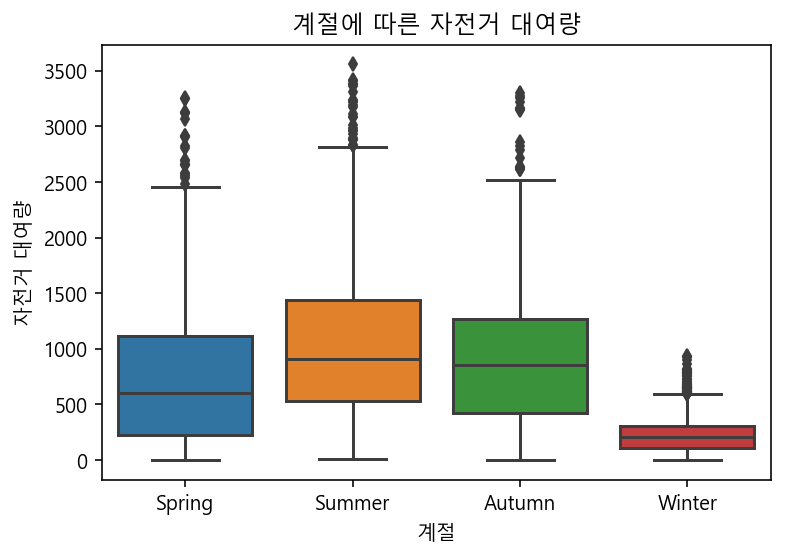

In [337]:
# 시각화 : 막대그래프
sns.barplot(x='Seasons', y='Rented Bike Count', data=data_mean_season, order=['Spring','Summer','Autumn','Winter'])
plt.title('계절에 따른 자전거 평균 대여량')
plt.xlabel('계절')
plt.ylabel('자전거 평균 대여량')
plt.show()

# 여름, 가을, 봄, 겨울 순으로 평균 대여량이 많다.

# 시각화 : 박스플롯
sns.boxplot(x='Seasons', y='Rented Bike Count', data=data2, order=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.title('계절에 따른 자전거 대여량')
plt.xlabel('계절')
plt.ylabel('자전거 대여량')

# 여름과 가을의 대여량 중위수는 거의 비슷하다.

- 여름, 봄, 겨울, 가을 순으로 데이터의 개수가 많지만 큰 차이는 없음(계절별 데이터 분포가 거의 동일함)
- 여름에 평균 자전거 대여량이 가장 높게 나타남
- 겨울에 자전거 대여량의 중위수가 제일 낮게 나타남

## Holiday(공휴일 유무)

No Holiday    8057
Holiday        408
Name: Holiday, dtype: int64


Text(0, 0.5, '빈도')

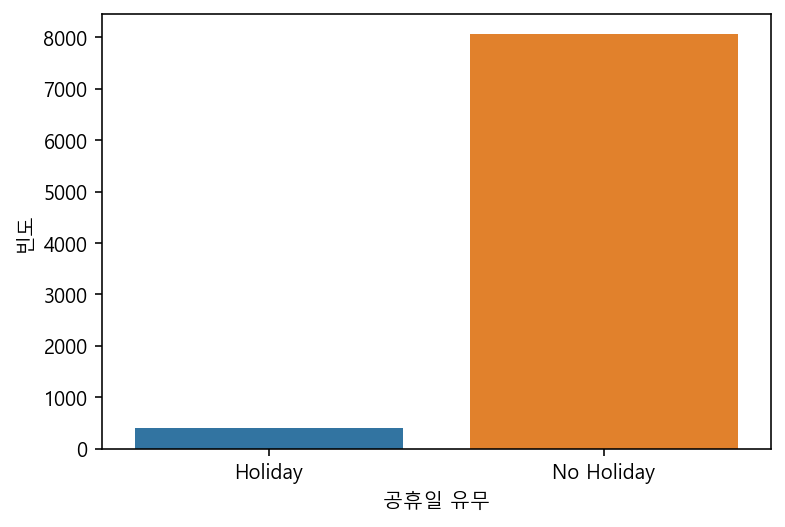

In [339]:
# 분포 확인하기
print(data2.Holiday.value_counts())

# 시각화
sns.countplot(x='Holiday', data=data2)
plt.xlabel('공휴일 유무')
plt.ylabel('빈도')

In [340]:
# 자전거 대여량과의 관계 살펴보기
print(data2.groupby('Holiday').mean()['Rented Bike Count'].sort_values(ascending=False)) 

# 공휴일이 아닌 경우와 공휴일인 경우의 평균 대여량은 약 1.5배 차이가 남

Holiday
No Holiday    739.284970
Holiday       529.154412
Name: Rented Bike Count, dtype: float64


In [341]:
# 공휴일 유무에 따른 평균대여량을 data_mean_holiday라는 새로운 데이터프레임에 저장 
data_mean_holiday = pd.DataFrame(data2.groupby('Holiday').mean()['Rented Bike Count'])
data_mean_holiday = data_mean_holiday.reset_index()
data_mean_holiday

,Holiday,Rented Bike Count
0,Holiday,529.154412
1,No Holiday,739.284970


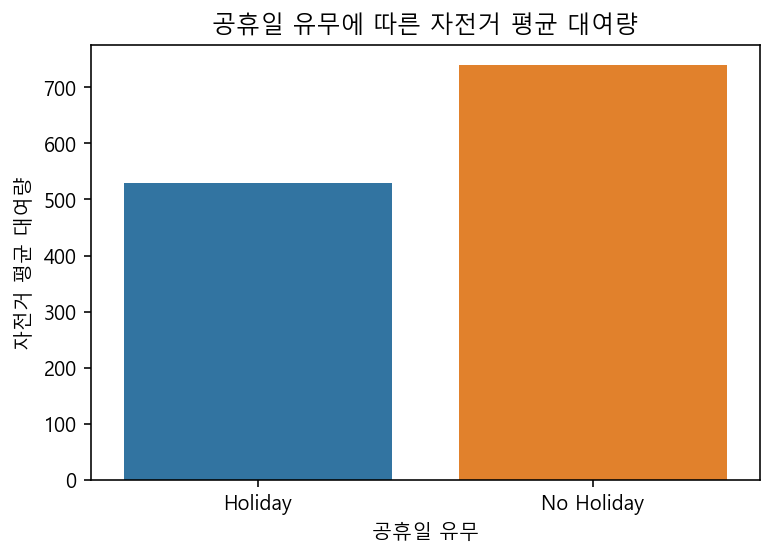

Text(0, 0.5, '자전거 평균 대여량')

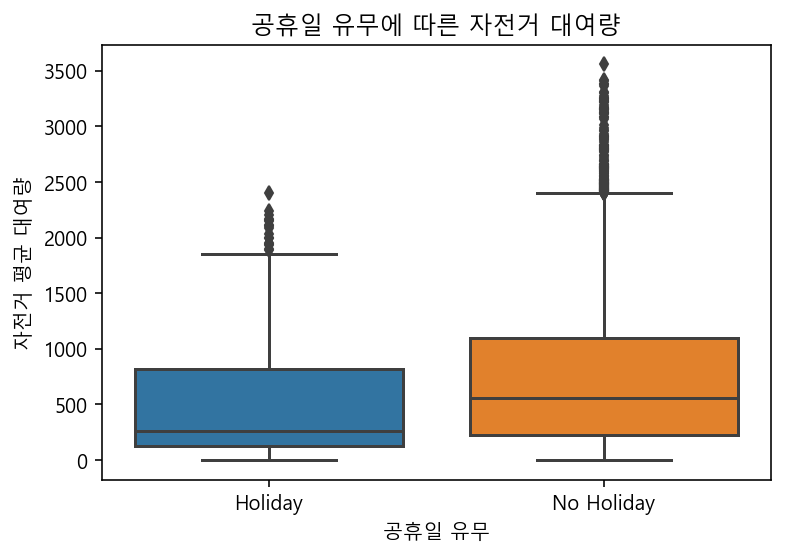

In [342]:
# 시각화 : 막대그래프
sns.barplot(x='Holiday', y='Rented Bike Count', data=data_mean_holiday)
plt.title('공휴일 유무에 따른 자전거 평균 대여량')
plt.xlabel('공휴일 유무')
plt.ylabel('자전거 평균 대여량')
plt.show()

# 시각화 : 박스플롯
sns.boxplot(x='Holiday', y='Rented Bike Count', data=data2, order=['Holiday', 'No Holiday'])
plt.title('공휴일 유무에 따른 자전거 대여량')
plt.xlabel('공휴일 유무')
plt.ylabel('자전거 평균 대여량')

# 공휴일이 아닐 때 평균 대여량이 더 높게 나타났다.
# 대여량의 중위수 역시 공휴일이 아닐 때가 더 높게 나타났다.

- 데이터의 대부분이 공휴일이 아님.
- 공휴일이 아닌 경우의 평균 대여량은 공휴일인 경우 평균 대여량에 비해 약 1.5배 많음